In this notebook I analyze the computer performance (level 1, 3, 5, 7,9, 11, 13, 15) against humans. 

In [1]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix

First, I look on rounds the smallest unit in which a winner can be determined. 

In [2]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()
print(list_input_files2)

['human_computer3_001.txt', 'human_computer3_002.txt', 'human_computer3_003.txt', 'human_computer3_004.txt', 'human_computer3_005.txt', 'human_computer3_006.txt', 'human_computer3_007.txt', 'human_computer3_008.txt', 'human_computer3_009.txt', 'human_computer3_010.txt', 'human_computer3_011.txt', 'human_computer3_012.txt', 'human_computer3_013.txt', 'human_computer3_014.txt', 'human_computer3_015.txt', 'human_computer3_016.txt', 'human_computer3_017.txt', 'human_computer3_018.txt', 'human_computer3_019.txt', 'human_computer3_020.txt', 'human_computer3_021.txt', 'human_computer3_022.txt', 'human_computer3_023.txt', 'human_computer3_024.txt']


In [3]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [4]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [5]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [6]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [7]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [8]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])   

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [9]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

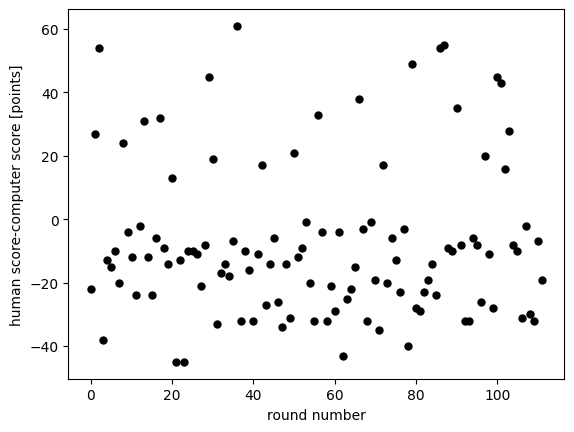

In [10]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

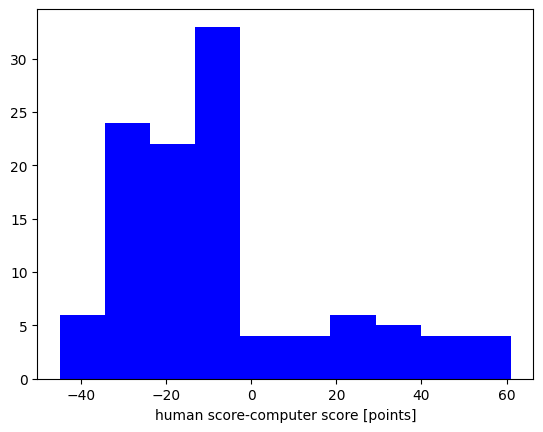

In [11]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

Now I look on full games in level 1, 3 and 5, 7. That is more important because since  a game is the final unit of Skyjo.

In [12]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files_l1=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l1.sort()
print(list_input_files_l1)

list_input_files_l3=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer3_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l3.sort()
print(list_input_files_l3)

list_input_files_l5=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l5.sort()
print(list_input_files_l5)

list_input_files_l7=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer7_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l7.sort()
print(list_input_files_l7)

list_input_files_l9=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer9_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l9.sort()
print(list_input_files_l9)

list_input_files_l11=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer11_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l11.sort()
print(list_input_files_l11)

list_input_files_l13=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer13_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l13.sort()
print(list_input_files_l13)

list_input_files_l15=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer15_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l15.sort()
print(list_input_files_l15)

['human_computer1_g001.txt', 'human_computer1_g002.txt', 'human_computer1_g003.txt', 'human_computer1_g004.txt', 'human_computer1_g005.txt', 'human_computer1_g006.txt', 'human_computer1_g007.txt', 'human_computer1_g008.txt', 'human_computer1_g009.txt', 'human_computer1_g010.txt', 'human_computer1_g011.txt', 'human_computer1_g012.txt', 'human_computer1_g013.txt', 'human_computer1_g014.txt', 'human_computer1_g015.txt', 'human_computer1_g016.txt', 'human_computer1_g017.txt', 'human_computer1_g018.txt', 'human_computer1_g019.txt', 'human_computer1_g020.txt', 'human_computer1_g021.txt', 'human_computer1_g022.txt', 'human_computer1_g023.txt', 'human_computer1_g024.txt', 'human_computer1_g025.txt', 'human_computer1_g026.txt', 'human_computer1_g027.txt', 'human_computer1_g028.txt', 'human_computer1_g029.txt', 'human_computer1_g030.txt', 'human_computer1_g031.txt', 'human_computer1_g032.txt', 'human_computer1_g033.txt']
['human_computer3_g001.txt', 'human_computer3_g002.txt', 'human_computer3_g

In [15]:
#input file list and integer for computer level  
def get_game_stat(file_list,int2):
    resl1=np.zeros((7,len(file_list)))
    deltahuman=0
    deltacomputer=0
    #list of results, currect ones need to 
    for i in range(len(file_list)):
        finfile=np.loadtxt(file_list[i])   
        #get previous also to check that it is doe snot include also old input
        resl1[0,i]=i+1
        #number of turns 
        resl1[4,i]=finfile.shape[1]
        #number of rounds
        resl1[5,i]=finfile[51,finfile.shape[1]-1]+1
        #get scores of all games added together
        scores=np.zeros((2,int(resl1[5,i])))
        for j in range(finfile.shape[1]):
            if finfile[0,j]==0:
                scores[0:2,int(finfile[51,j])]=finfile[49:51,j]
            else:
                scores[0,int(finfile[51,j])]=finfile[50,j]
                scores[1,int(finfile[51,j])]=finfile[49,j]           
        #always player 0, human first 
        resl1[1,i]=sum(scores[0,:])
        resl1[2,i]=sum(scores[1,:])
                    
        if finfile[0,0]==0:
            #human winner mark
            resl1[3,i]=finfile[52,0]
        else:
            resl1[3,i]=finfile[53,0]
        resl1[6,:]=int2     
    return resl1       

In [16]:
resl1=get_game_stat(list_input_files_l1,1)
print("human against computer level 1")
print(f"the human won {int(sum(resl1[3]))} times of {resl1.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl1[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl1[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl1[2]-resl1[1]),3)} points")
print(f"the human wins to {round(np.mean(resl1[3]*100),1)} %")
print("")
resl3=get_game_stat(list_input_files_l3,3)
print("human against computer level 3")
print(f"the human won {int(sum(resl3[3]))} times of {resl3.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl3[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl3[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl3[2]-resl3[1]),3)} points")
print(f"the human wins to {round(np.mean(resl3[3]*100),1)} %")
print("")
resl5=get_game_stat(list_input_files_l5,5)
print("human against computer level 5")
print(f"the human won {int(sum(resl5[3]))} times of {resl5.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl5[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl5[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl5[2]-resl5[1]),3)} points")
print(f"the human wins to {round(np.mean(resl5[3]*100),1)} %")
print(" ")
resl7=get_game_stat(list_input_files_l7,7)
print("human against computer level 7")
print(f"the human won {int(sum(resl7[3]))} times of {resl7.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl7[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl7[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl7[2]-resl7[1]),3)} points")
print(f"the human wins to {round(np.mean(resl7[3]*100),1)} %")
print(" ")
resl9=get_game_stat(list_input_files_l9,9)
print("human against computer level 9")
print(f"the human won {int(sum(resl9[3]))} times of {resl9.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl9[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl9[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl9[2]-resl9[1]),3)} points")
print(f"the human wins to {round(np.mean(resl9[3]*100),1)} %")
print(" ")
resl11=get_game_stat(list_input_files_l11,11)
print("human against computer level 11")
print(f"the human won {int(sum(resl11[3]))} times of {resl11.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl11[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl11[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl11[2]-resl11[1]),3)} points")
print(f"the human wins to {round(np.mean(resl11[3]*100),1)} %")
print(" ")
resl13=get_game_stat(list_input_files_l13,13)
print("human against computer level 13")
print(f"the human won {int(sum(resl13[3]))} times of {resl13.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl13[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl13[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl13[2]-resl13[1]),3)} points")
print(f"the human wins to {round(np.mean(resl13[3]*100),1)} %")
print(" ")
resl15=get_game_stat(list_input_files_l15,15)
print("human against computer level 15")
print(f"the human won {int(sum(resl15[3]))} times of {resl15.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl15[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl15[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl15[2]-resl15[1]),3)} points")
print(f"the human wins to {round(np.mean(resl15[3]*100),1)} %")

human against computer level 1
the human won 25 times of 33 rounds
the human average is 82.242 points
the computer average is 111.758 points
the human average adventage is  29.515 points
the human wins to 75.8 %

human against computer level 3
the human won 21 times of 21 rounds
the human average is 54.81 points
the computer average is 150.381 points
the human average adventage is  95.571 points
the human wins to 100.0 %

human against computer level 5
the human won 199 times of 240 rounds
the human average is 77.704 points
the computer average is 110.754 points
the human average adventage is  33.05 points
the human wins to 82.9 %
 
human against computer level 7
the human won 21 times of 21 rounds
the human average is 59.381 points
the computer average is 131.19 points
the human average adventage is  71.81 points
the human wins to 100.0 %
 
human against computer level 9
the human won 20 times of 20 rounds
the human average is 67.45 points
the computer average is 116.05 points
the hum

Text(0, 0.5, 'computer score [points]')

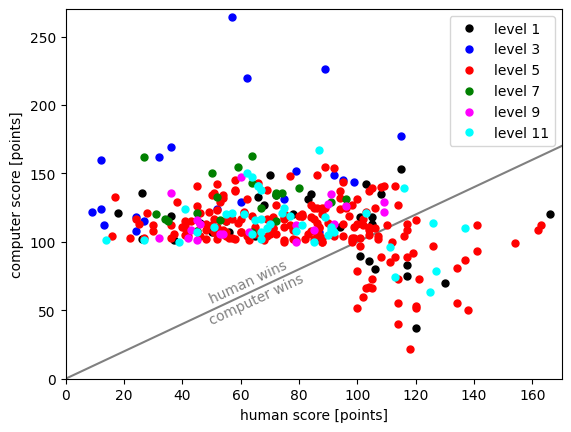

In [15]:
li=[0,300]
plt.plot(li,li,'-',ms=5,color='gray') 
plt.plot(resl1[1,:],resl1[2,:],'o',ms=5,color='black',label='level 1') 
plt.plot(resl3[1,:],resl3[2,:],'o',ms=5,color='blue',label='level 3') 
plt.plot(resl5[1,:],resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.plot(resl7[1,:],resl7[2,:],'o',ms=5,color='green',label='level 7') 
plt.plot(resl9[1,:],resl9[2,:],'o',ms=5,color='magenta',label='level 9') 
plt.plot(resl11[1,:],resl11[2,:],'o',ms=5,color='cyan',label='level 11') 
plt.text(50, 55, 'human wins', color='gray',rotation=25, rotation_mode='anchor')
plt.text(50, 40, 'computer wins', color='gray',rotation=25, rotation_mode='anchor')
plt.legend(loc="best")
plt.xscale("linear")
plt.xlim(0,170)
plt.ylim(0,270)
plt.xlabel("human score [points]")
plt.ylabel("computer score [points]")

Most played is level 5, below I show the human adventage over time. 

(-5.0, 245.0)

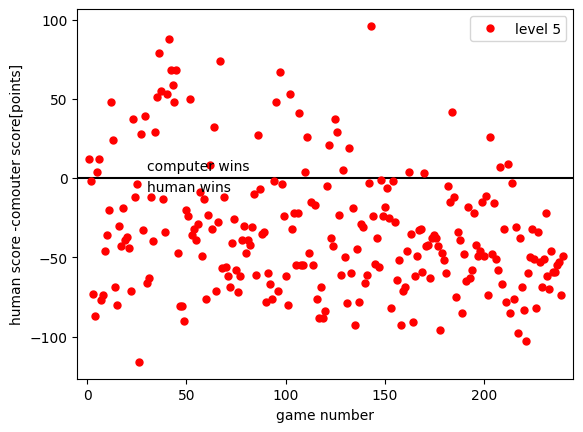

In [25]:


li=[-5,np.max(resl5[0,:]+5)]
li2=[0,0]
plt.plot(li,li2,'-',ms=5,color='black') 
plt.plot(resl5[0,:],resl5[1,:]-resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.legend(loc="best")
plt.xscale("linear")
plt.ylabel("human score -comouter score[points]")
plt.xlabel("game number")
plt.text(30, -8, 'human wins', color='black',rotation=0, rotation_mode='anchor')
plt.text(30, 5, 'computer wins', color='black',rotation=0, rotation_mode='anchor')
plt.xlim(-5,np.max(resl5[0,:]+5))

There is a trend visible the human adventage improves over time. The humans learn to predict the computer behavious better while the computer does not learn with a level. 

Text(0, 0.5, 'computer-human score [points]')

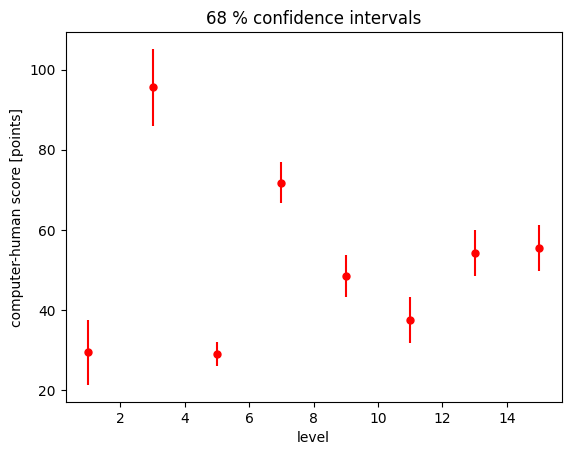

In [16]:
list_res=[resl1,resl3,resl5,resl7,resl9,resl11,resl13,resl15]
stat=np.zeros((6,len(list_res)))
for i in range(len(list_res)):
    stat[0,i]=list_res[i][6,0]
    stat[1,i]=np.mean(list_res[i][2,:]-list_res[i][1,:])
    stat[2,i]=np.std(list_res[i][2,:]-list_res[i][1,:])/np.sqrt(list_res[i].shape[1])
    stat[3,i]=np.mean(list_res[i][3]) 
    alpha=0.317
    k=int(np.sum(list_res[i][3]))
    n=list_res[i].shape[1]
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    stat[4,i]=p_u
    stat[5,i]=p_o
    if np.isnan(stat[5,i]):
        stat[5,i]=1
lower_error =  stat[3]-stat[4,:]
upper_error =  stat[5,:]-stat[3]
asymmetric_error = np.array([lower_error,upper_error])
plt.errorbar(stat[0,:],stat[1,:], yerr=stat[2,:],ms=5, fmt='o',color='red')
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("computer-human score [points]")

Text(0, 0.5, '% human wins')

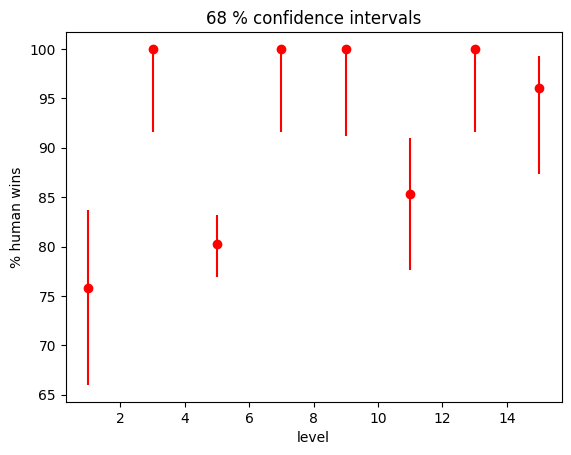

In [17]:
plt.errorbar(stat[0,:],100*stat[3,:], yerr=asymmetric_error*100, fmt='o', color = 'red')   
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("% human wins")

The computer in level 3 and 7 performs worse, the computer never wins there and the average point advantages are also similar. The computer is better in level 1 and 5, it wins about 1/4, enough that the game makes fun. 
There is no improvement of level 5 to 1 visible. However it can only be so small that it is not an interesting improvement, which would be equal changes for human and computer. Also humans get better when playiong long against a level, then the comouter wins only rarely then. 


Level 9 and 11 which are trained on human games (9 imitating humans, 11 the winner in human against comoputer games) perform also not so well. Level 9 seems to be always winnable, level 11 is better, but likely still easier than than level 1 and 5. Thus the learning from human experience did not work so well. Likely a contributing factor is that training was difficult with only 279 independent data sets (games or stand alone rounds). 

With that number likely too many feature were used at least for the classification steps. Thus, as the next step I will reduce the number of feature, excluding ones with low importance in the current fit. 

That is level 13 and 15, but that is not improving likely even getting worse. 

Here I check whether the played card always gets on top of the open pile. 

In [29]:
#yes the differences are when one vanishes
for i in range(len(list_input_files_l11)):
    a=np.loadtxt(list_input_files_l11[i])
    print(f"game {i}")
    for j in range(1,a.shape[1]):
        if(a[51,j]==a[51,j-1]):
            if(int(a[46,j-1])!=20  and int(a[46,j-1])!=int(a[1,j])):
                print(f"previosly vanishing is {bool(a[47,j-1])}")
                print(f"open pile card is {int(a[1,j])} previosly played card is {int(a[46,j-1])}")
# human_computer11_g033.txt  has suspected mistake back giving at the beginning                

game 0
previosly vanishing is True
open pile card is 4 previosly played card is -1
game 1
previosly vanishing is True
open pile card is 4 previosly played card is 1
game 2
previosly vanishing is True
open pile card is 3 previosly played card is 2
previosly vanishing is True
open pile card is 5 previosly played card is 0
previosly vanishing is True
open pile card is 3 previosly played card is 4
game 3
previosly vanishing is True
open pile card is 5 previosly played card is 4
game 4
game 5
previosly vanishing is True
open pile card is 0 previosly played card is 5
game 6
game 7
previosly vanishing is True
open pile card is 5 previosly played card is 0
game 8
previosly vanishing is True
open pile card is 8 previosly played card is 6
previosly vanishing is True
open pile card is 6 previosly played card is 8
game 9
game 10
previosly vanishing is True
open pile card is 3 previosly played card is 0
game 11
previosly vanishing is True
open pile card is 5 previosly played card is 4
previosly van

In [30]:
a=np.loadtxt('human_computer11_g033.txt')
#checking same card appear when not played before (look like that happens too often)
#looks all fine is just happeing sometimes that three same as close (other player in between makes it easier )
for i in range(7):
    print(f"player {int(a[0,i])} open card is {int(a[1,i])} in closed {int(a[17,i])} below in open are {int(sum(a[2:17,i]))}")
    print(f"acting player cards {np.round(a[18:30,i])}")
    print(f"take open is {bool(a[42,i])}")
    print(f"discard closed is {bool(a[43,i])}")
    if a[44,i]!=30:
        print(f"closed card value is {int(a[44,i])}")
    print(f"played card value is {int(a[46,i])}")    
    print(f"card vanishing is {bool(a[47,i])}")    

player 0 open card is 10 in closed 125 below in open are 0
acting player cards [20. 20. 20. 20. 20.  3. 10. 20. 20. 20. 20. 20.]
take open is True
discard closed is False
played card value is 20
card vanishing is False
player 1 open card is 9 in closed 125 below in open are 0
acting player cards [20. 20. 20. 10. 20. 20.  1. 20. 20. 20. 20. 20.]
take open is False
discard closed is False
closed card value is 12
played card value is 20
card vanishing is False
player 0 open card is 2 in closed 124 below in open are 1
acting player cards [20. 20. 10. 20. 20.  3. 10. 20. 20. 20. 20. 20.]
take open is True
discard closed is False
played card value is 20
card vanishing is False
player 1 open card is 8 in closed 124 below in open are 1
acting player cards [12. 20. 20. 10. 20. 20.  1. 20. 20. 20. 20. 20.]
take open is False
discard closed is False
closed card value is 9
played card value is 10
card vanishing is False
player 0 open card is 10 in closed 123 below in open are 2
acting player cards

Below I check how good the models are to predict points in the rounds against humans. 

In [31]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [32]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

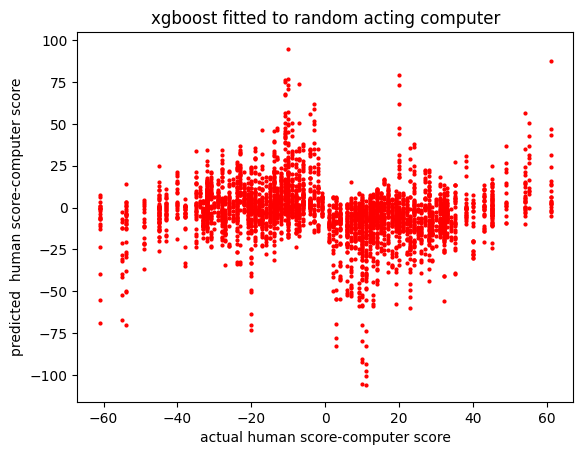

In [33]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

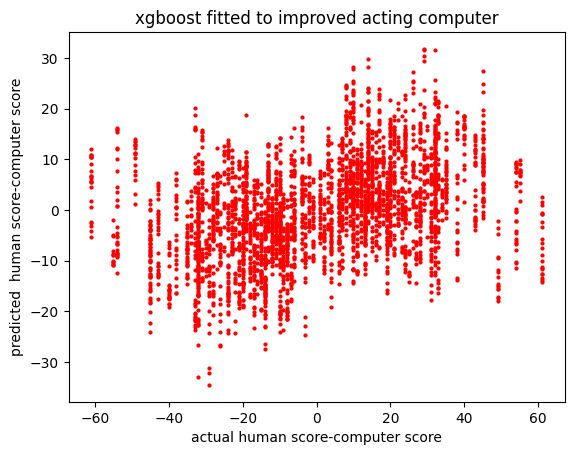

In [34]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [35]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [36]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


Now inventing predictors for equal cards in columns. 

In [37]:
df['own_equal1']=df.loc[:,['own_cards_0','own_cards_4','own_cards_8']][(df.loc[:,'own_cards_0']==df.loc[:,'own_cards_4']) & (df.loc[:,['own_cards_0','own_cards_4','own_cards_8']]!=20) & (df.loc[:,['own_cards_0','own_cards_4','own_cards_8']]!=30)].count(axis=1)
print(df.own_equal1)

0       0
1       0
2       0
3       0
4       0
       ..
3560    0
3561    0
3562    0
3563    0
3564    0
Name: own_equal1, Length: 3565, dtype: int64


In [38]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [39]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

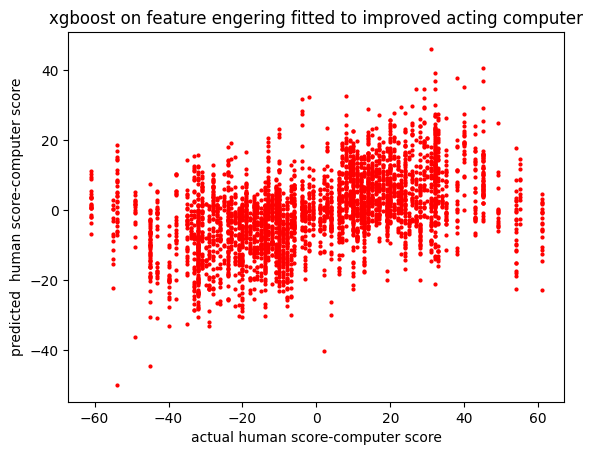

In [40]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [41]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [42]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [43]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1277 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [44]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1309 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.0461 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.0902 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.0661 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.06 seconds
standard deviation of test 25.9178 points
sta

In [45]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

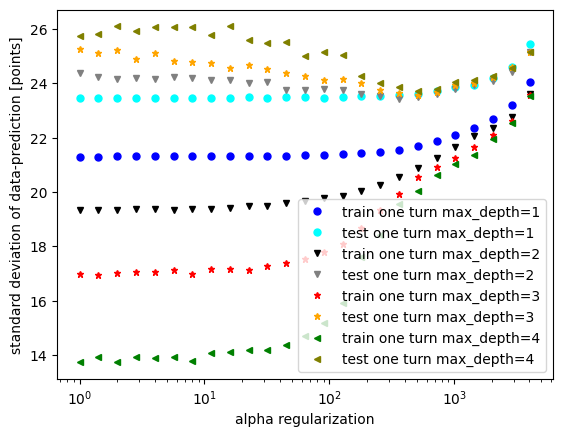

In [46]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [47]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open==1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [48]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 61)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [49]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')     
for i in range(24,30):
    print(i)
    print(columns[i])
print(len(columns))

24
other_player_cards_11
25
action_take_open
26
action_discard
27
discard_value
28
id_player_card
29
numeric_player_card
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


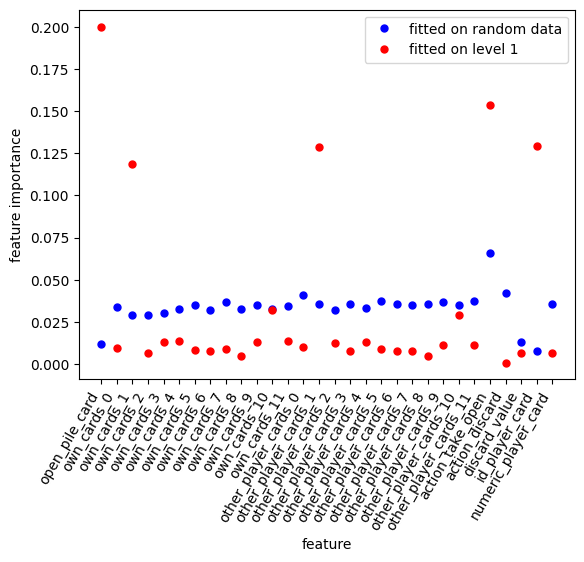

In [50]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


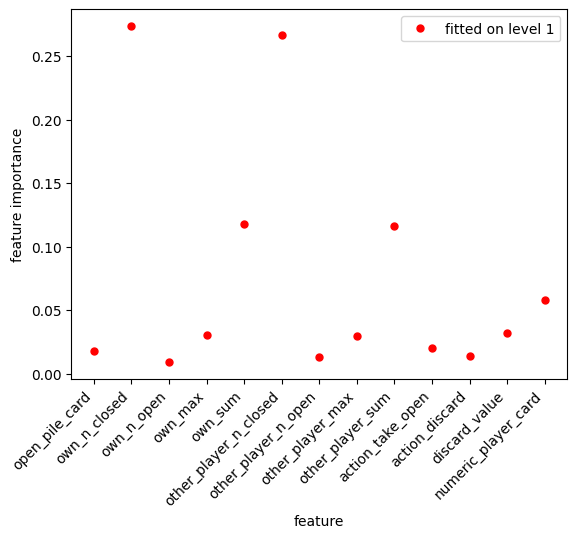

In [51]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  

Reason for no improvement could be that the system fits too much the past xgboost model which helps for predicting future
but possible not for winning. Using first level data which is more random in a better moredl could help agaoinst that. 


New Idea

Human imitation. Now predicting which card was used. First for all human actions. Later possible restricting to won games, could add other wins to it.

Both rounds and games are used. 

In [52]:
list_all=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer')) and os.path.isfile(os.path.join(myPath, f))]
#randomness wanted that test train have random subsets of it since splitting is not random 
random.shuffle(list_all)
print(len(list_all))
#used for first on human training were 279 games/stand alone rounds

565


In [53]:
#get all columns for now, add also win worker
#first get number of rows 
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])
    cc+=a.shape[1]
print(cc)  
all_hu_com=np.zeros((55,int(cc)))
#55 is number of data entry
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])    
    #rounds
    if a.shape[0]==51:
        all_hu_com[0:51,cc:cc+a.shape[1]]=a
        #rounds
        all_hu_com[51,cc:cc+a.shape[1]]=0
        #not fats but not big here
        for j in range(a.shape[1]):
            if a[49,j]<a[50,j]:
                all_hu_com[52,cc+j]=1
            else:
                all_hu_com[53,cc+j]=1
    else:            
         all_hu_com[0:54,cc:cc+a.shape[1]]=a   
    all_hu_com[54,cc:cc+a.shape[1]]=i        
    cc+=a.shape[1]     
    

51048


In [54]:
#column names 
columns2=['acting_player']
columns2.append('open_pile_card')
for i in range(15):
    columns2.append('number_of_'+str(i-2)+'_in_open')
columns2.append('number_of_cards_in_closed')
for i in range(12):
    columns2.append('own_cards_'+str(i))
for i in range(12):
    columns2.append('other_player_cards_'+str(i))    
columns2.append('action_take_open')
columns2.append('action_discard')
columns2.append('discard_value')
columns2.append('id_player_card')
columns2.append('numeric_player_card') 
columns2.append('vanish_marker')
columns2.append('turn')
columns2.append('score_self')
columns2.append('score_other')
columns2.append('round_number')
columns2.append('winner_self')
columns2.append('winner_other')
columns2.append('entry_number')
print(len(columns2),columns2)

55 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [55]:
df_hum_com = pd.DataFrame(data = all_hu_com.T, index=range(all_hu_com.shape[1]),columns = columns2)
print(df_hum_com.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            1.0             5.0                   0.0                   0.0   
1            0.0            12.0                   0.0                   0.0   
2            1.0            11.0                   0.0                   0.0   
3            0.0             8.0                   0.0                   0.0   
4            1.0             7.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Select human, human who wins and all winners now.

In [56]:
#select human is first player
df_hum=df_hum_com[df_hum_com.acting_player==0]
#human wins
df_hum_win=df_hum_com[(df_hum_com.acting_player==0) & (df_hum_com.winner_self==1)]
#all wins
df_win=df_hum_com[ (df_hum_com.winner_self==1)]
print(df_hum.shape,df_hum_win.shape,df_win.shape)


(24909, 55) (21516, 55) (25062, 55)


Now I get some sumarizing columns for the player cards, since it is clear that for using single card information
there were not enough games. 

In [57]:
#get average value of cards
weight_vec=np.array([5/150,10/150,15/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150]) 
vals=np.array(range(-2,13))

av_value=np.dot(vals,weight_vec)
#average vale of card
print(f"average value is {av_value}")
df_hum['own_n_closed']=df_hum.loc[:,'own_cards_0':'own_cards_11'][df_hum.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df_hum['own_n_open']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum['own_sum']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum['own_max']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum['other_player_n_closed']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum['other_player_n_open']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum['other_player_sum']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum['other_player_max']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
#replace placeholder with for closed with avg_value
df_hum['value_player_card']=df_hum['numeric_player_card']
df_hum.value_player_card[df_hum.numeric_player_card==20]=av_value

#now same for human wins
df_hum_win['own_n_closed']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][df_hum_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_hum_win['own_n_open']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum_win['own_sum']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum_win['own_max']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum_win['other_player_n_closed']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum_win['other_player_n_open']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum_win['other_player_sum']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum_win['other_player_max']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_hum_win['value_player_card']=df_hum_win['numeric_player_card']
df_hum_win.value_player_card[df_hum_win.numeric_player_card==20]=av_value


#now same for wins
df_win['own_n_closed']=df_win.loc[:,'own_cards_0':'own_cards_11'][df_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_win['own_n_open']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_win['own_sum']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_win['own_max']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_win['other_player_n_closed']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_win['other_player_n_open']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_win['other_player_sum']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_win['other_player_max']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_win['value_player_card']=df_win['numeric_player_card']
df_win.value_player_card[df_win.numeric_player_card==20]=av_value

#now selecting no take_open to train on discard action 
df_hum_discard=df_hum[df_hum.action_take_open==0]
df_win_discard=df_win[df_win.action_take_open==0]
df_hum_win_discard=df_hum_win[df_hum_win.action_take_open==0]

#now selecting not closed discrad actions 
df_hum_value=df_hum[df_hum.action_discard==0]
df_win_value=df_win[df_win.action_discard==0]
df_hum_win_value=df_hum_win[df_hum_win.action_discard==0]

average value is 5.066666666666666


Now I am looking on correlations. 

In [58]:
#s1 corr(s2, method='pearson')
corrs=df_hum.corr('pearson')
#now only wins 
corrs_hum_win=df_hum_win.corr('pearson')
corrs_win=df_win.corr('pearson')
#only using discard actions
corrs_discard=df_hum_discard.corr('pearson')
#now only wins 
corrs_hum_win_discard=df_hum_win_discard.corr('pearson')
corrs_win_discard=df_win_discard.corr('pearson')
#only using not needing to take closed actions
corrs_value=df_hum_value.corr('pearson')
#now only wins 
corrs_hum_win_value=df_hum_win_value.corr('pearson')
corrs_win_value=df_win_value.corr('pearson')

open_pile_card
 human  has correlation of -0.7604
 human wins has correlation of -0.7627
 wins has correlation of -0.7617
action_discard
 human  has correlation of -0.4663
 human wins has correlation of -0.4635
 wins has correlation of -0.4387
discard_value
 human  has correlation of 0.9617
 human wins has correlation of 0.9625
 wins has correlation of 0.9604
numeric_player_card
 human  has correlation of -0.1025
 human wins has correlation of -0.0945
 wins has correlation of -0.0844
vanish_marker
 human  has correlation of 0.1064
 human wins has correlation of 0.1072
 wins has correlation of 0.1043
other_player_max
 human  has correlation of -0.097
 human wins has correlation of -0.0862
 wins has correlation of -0.1067


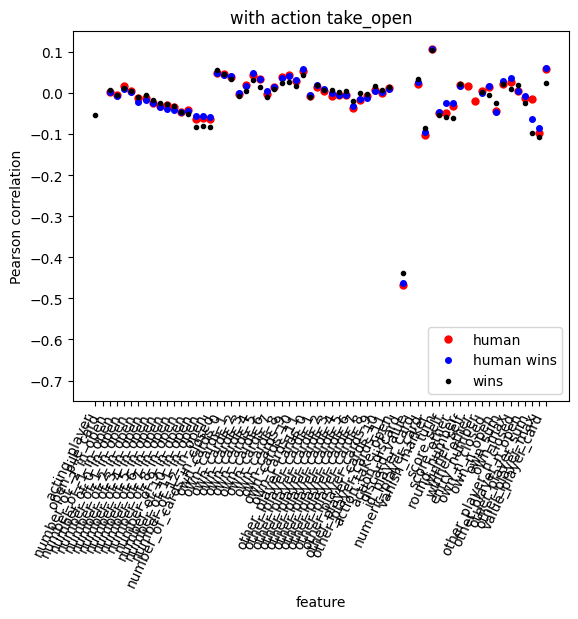

In [59]:
plt.plot(df_hum.columns,corrs.action_take_open,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_take_open,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_take_open,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.75,0.15)
plt.xticks(rotation=65, ha='right')
plt.title("with action take_open")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_take_open[i]<1 and  (abs(corrs.action_take_open[i])>0.10 or abs(corrs_hum_win.action_take_open[i])>0.10 or  abs(corrs_win.action_take_open[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_take_open[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_take_open[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_take_open[i],4)}")     

Some of the action happen only after take_action is decided like discard, x_player_card, score_x thus they should be ignored. Also vanish_marker cannot be just used because it happens only after it. However, the possibility of it could (and likely should be when just one exchange is missing) be predicted.

The strongest correlation is with the open card value as expected. All others are clearly less important, the next important is other_player_max

Now looking on discard action , thewre only cases the open pile card is not uswd are considered.

other_player_cards_3
 human  has correlation of 0.101
 human wins has correlation of 0.0976
 wins has correlation of 0.0873
other_player_cards_4
 human  has correlation of 0.1064
 human wins has correlation of 0.1038
 wins has correlation of 0.0906
other_player_cards_6
 human  has correlation of 0.112
 human wins has correlation of 0.1117
 wins has correlation of 0.1035
other_player_cards_7
 human  has correlation of 0.0973
 human wins has correlation of 0.0988
 wins has correlation of 0.1012
discard_value
 human  has correlation of 0.7287
 human wins has correlation of 0.7377
 wins has correlation of 0.6779
numeric_player_card
 human  has correlation of 0.5018
 human wins has correlation of 0.4902
 wins has correlation of 0.5207
vanish_marker
 human  has correlation of -0.1354
 human wins has correlation of -0.1365
 wins has correlation of -0.1169
score_self
 human  has correlation of 0.1311
 human wins has correlation of 0.133
 wins has correlation of 0.0688
score_other
 human  has c

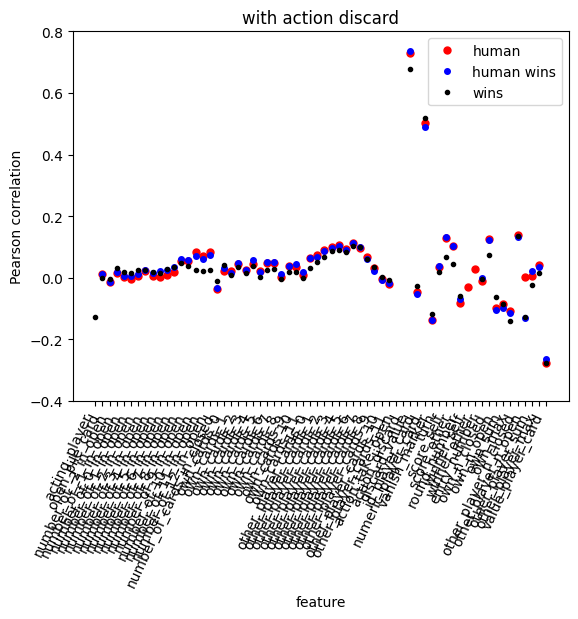

In [61]:
plt.plot(df_hum.columns,corrs_discard.action_discard,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_discard.action_discard,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_discard.action_discard,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.4,0.8)
plt.xticks(rotation=65, ha='right')
plt.title("with action discard")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_discard.action_discard[i]<1 and  (abs(corrs_discard.action_discard[i])>0.10 or abs(corrs_hum_win_discard.action_discard[i])>0.10 or  abs(corrs_win_discard.action_discard[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_discard.action_discard[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_discard.action_discard[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_discard.action_discard[i],4)}")     

The x_player card is happening afterwards in a turn. As expected discard value has the strongest correlation since it depends from that value which action is the best. 

Below then the correlation with played card ignoring the cases when a closed one needed to be taken. In two variants, first closed card are 20, then they are 5.07 which they are in average. 

number_of_10_in_open
 human  has correlation of 0.0955
 human wins has correlation of 0.0543
 wins has correlation of 0.1381
number_of_11_in_open
 human  has correlation of 0.0982
 human wins has correlation of 0.0606
 wins has correlation of 0.1354
number_of_12_in_open
 human  has correlation of 0.0971
 human wins has correlation of 0.0565
 wins has correlation of 0.1387
own_cards_2
 human  has correlation of 0.0981
 human wins has correlation of 0.0937
 wins has correlation of 0.1076
numeric_player_card
 human  has correlation of -0.1825
 human wins has correlation of -0.1786
 wins has correlation of -0.1344
vanish_marker
 human  has correlation of -0.2294
 human wins has correlation of -0.2288
 wins has correlation of -0.2082
score_self
 human  has correlation of 0.1379
 human wins has correlation of 0.0989
 wins has correlation of 0.1589
score_other
 human  has correlation of 0.0372
 human wins has correlation of 0.0243
 wins has correlation of 0.1066
own_sum
 human  has correlatio

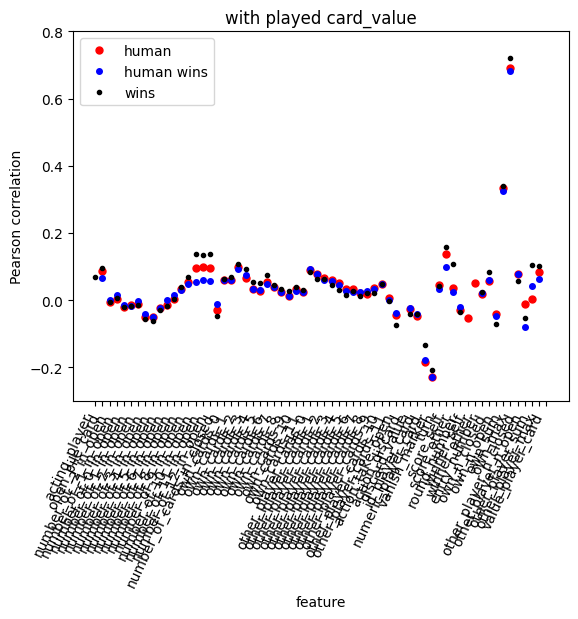

In [62]:
plt.plot(df_hum.columns,corrs_value.value_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_value.value_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_value.value_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.8)
plt.xticks(rotation=65, ha='right')
plt.title("with played card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.value_player_card[i]<1 and  (abs(corrs_value.value_player_card[i])>0.10 or abs(corrs_hum_win_value.value_player_card[i])>0.10 or  abs(corrs_win_value.value_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.value_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.value_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.value_player_card[i],4)}")   

number_of_3_in_open
 human  has correlation of -0.1011
 human wins has correlation of -0.0985
 wins has correlation of -0.0979
number_of_4_in_open
 human  has correlation of -0.1083
 human wins has correlation of -0.1021
 wins has correlation of -0.1007
number_of_5_in_open
 human  has correlation of -0.1629
 human wins has correlation of -0.1649
 wins has correlation of -0.1633
number_of_6_in_open
 human  has correlation of -0.1194
 human wins has correlation of -0.1155
 wins has correlation of -0.1155
number_of_7_in_open
 human  has correlation of -0.1278
 human wins has correlation of -0.125
 wins has correlation of -0.1276
number_of_8_in_open
 human  has correlation of -0.1632
 human wins has correlation of -0.1508
 wins has correlation of -0.1586
number_of_9_in_open
 human  has correlation of -0.1429
 human wins has correlation of -0.1284
 wins has correlation of -0.1425
number_of_10_in_open
 human  has correlation of -0.174
 human wins has correlation of -0.1559
 wins has correlat

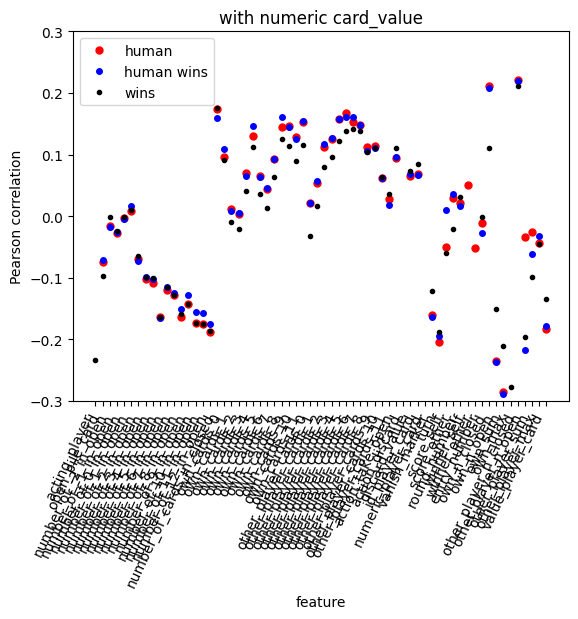

In [63]:
plt.plot(df_hum_value.columns,corrs_value.numeric_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win_value.columns,corrs_hum_win_value.numeric_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win_value.columns,corrs_win_value.numeric_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.3)
plt.xticks(rotation=65, ha='right')
plt.title("with numeric card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.numeric_player_card[i]<1 and  (abs(corrs_value.numeric_player_card[i])>0.10 or abs(corrs_hum_win_value.numeric_player_card[i])>0.10 or  abs(corrs_win_value.numeric_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.numeric_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.numeric_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.numeric_player_card[i],4)}")  

Both are similar, likely value is better, since there are at most very small effects when the card is closed when taking it. 

Again the most connectedness ones the action parts before and some not knowable are important, but the player card summarizing
numbers are also more important now, especially the maximum value of the own card set. 

Selecting some features which matter more likely for trying xgboost first for take_open.

In [64]:
print(df_hum.columns)
col_sel1=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','entry_number']
df_hum_sel=df_hum.loc[:,col_sel1]
df_hum_win_sel=df_hum_win.loc[:,col_sel1]
df_win_sel=df_win.loc[:,col_sel1]
#selection for discard
col_sel2=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','discard_value','action_discard','entry_number']
df_hum_sel_discard=df_hum_discard.loc[:,col_sel2]
df_hum_win_sel_discard=df_hum_win_discard.loc[:,col_sel2]
df_win_sel_discard=df_win_discard.loc[:,col_sel2]
#start next is selecting the ones for card value, include action_open (but not other) because only one of
#discard is possible 
#target is value_card and it is regression since it are points 
col_sel3=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','discard_value','value_player_card','entry_number']
print(len(col_sel3))
df_hum_sel_value=df_hum_value.loc[:,col_sel3]
df_hum_win_sel_value=df_hum_win_value.loc[:,col_sel3]
df_win_sel_value=df_win_value.loc[:,col_sel3]

Index(['acting_player', 'open_pile_card', 'number_of_-2_in_open',
       'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open',
       'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open',
       'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open',
       'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open',
       'number_of_11_in_open', 'number_of_12_in_open',
       'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1',
       'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5',
       'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9',
       'own_cards_10', 'own_cards_11', 'other_player_cards_0',
       'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3',
       'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6',
       'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9',
       'other_player_cards_10', 'other_player_cards_11', 'action_take_ope

In [65]:
#now splitting
df_hum_train,df_hum_test= train_test_split(df_hum_sel,train_size=0.60, shuffle=True, random_state=1)
df_hum_win_train,df_hum_win_test= train_test_split(df_hum_win_sel,train_size=0.60, shuffle=True, random_state=1)
df_win_train,df_win_test= train_test_split(df_win_sel,train_size=0.60, shuffle=True, random_state=1)
print(df_hum_win_train.shape)
#better splitting of games/round each is only in one sample, they are more similar than random results 
df_win_feature_train2,df_win_feature_test2,df_win_target_train2,df_win_target_test2=split_test(df_win_sel.iloc[:,0:9],df_win_sel.iloc[:,9], df_win_sel.iloc[:,10],0.6)
df_hum_feature_train2,df_hum_feature_test2,df_hum_target_train2,df_hum_target_test2=split_test(df_hum_sel.iloc[:,0:9],df_hum_sel.iloc[:,9], df_hum_sel.iloc[:,10],0.6)
df_hum_win_feature_train2,df_hum_win_feature_test2,df_hum_win_target_train2,df_hum_win_target_test2=split_test(df_hum_win_sel.iloc[:,0:9],df_hum_win_sel.iloc[:,9], df_hum_win_sel.iloc[:,10],0.6)
#now for discard 
df_win_feature_train2_discard,df_win_feature_test2_discard,df_win_target_train2_discard,df_win_target_test2_discard=split_test(df_win_sel_discard.iloc[:,0:10],df_win_sel_discard.iloc[:,10], df_win_sel_discard.iloc[:,11],0.6)
df_hum_feature_train2_discard,df_hum_feature_test2_discard,df_hum_target_train2_discard,df_hum_target_test2_discard=split_test(df_hum_sel_discard.iloc[:,0:10],df_hum_sel_discard.iloc[:,10], df_hum_sel_discard.iloc[:,11],0.6)
df_hum_win_feature_train2_discard,df_hum_win_feature_test2_discard,df_hum_win_target_train2_discard,df_hum_win_target_test2_discard=split_test(df_hum_win_sel_discard.iloc[:,0:10],df_hum_win_sel_discard.iloc[:,10], df_hum_win_sel_discard.iloc[:,11],0.6)
#now for value
df_win_feature_train2_value,df_win_feature_test2_value,df_win_target_train2_value,df_win_target_test2_value=split_test(df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11], df_win_sel_value.iloc[:,12],0.6)
df_hum_feature_train2_value,df_hum_feature_test2_value,df_hum_target_train2_value,df_hum_target_test2_value=split_test(df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11], df_hum_sel_value.iloc[:,12],0.6)
df_hum_win_feature_train2_value,df_hum_win_feature_test2_value,df_hum_win_target_train2_value,df_hum_win_target_test2_value=split_test(df_hum_win_sel_value.iloc[:,0:11],df_hum_win_sel_value.iloc[:,11], df_hum_win_sel_value.iloc[:,12],0.6)
print(df_hum_win_feature_train2_value.head())

(12909, 11)
15037
15102
14945
15003
12910
12910
9584
9620
9421
9466
8092
8106
11237
11270
10903
10916
9487
9525
   open_pile_card  own_n_closed  own_n_open  own_sum  own_max  \
1            12.0            10           2     18.0     11.0   
3             8.0            10           2      8.0      7.0   
5             3.0            10           2      0.0      1.0   
7             6.0             9           3      3.0      3.0   
9             2.0             8           4      2.0      3.0   

   other_player_n_closed  other_player_n_open  other_player_sum  \
1                     10                    2              11.0   
3                     10                    2               3.0   
5                     10                    2               2.0   
7                      9                    3               3.0   
9                      9                    3               6.0   

   other_player_max  action_take_open  discard_value  
1               8.0               0.0  

[[9452  168]
 [ 226 5256]]


(<AxesSubplot:title={'center':'train'}>, Text(0.5, 1.0, 'train'))

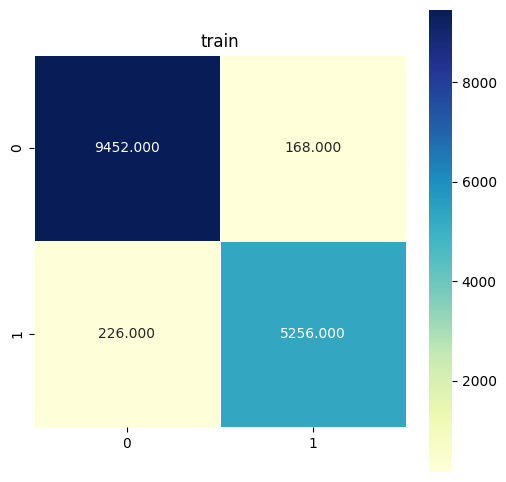

In [66]:
#now using better splitting and win
open1=XGBClassifier().fit(df_win_feature_train2,df_win_target_train2)
pred_te=open1.predict(df_win_feature_test2)
pred_tr=open1.predict(df_win_feature_train2)
conf_train = confusion_matrix(df_win_target_train2, pred_tr)
conf_test = confusion_matrix(df_win_target_test2, pred_te)
print(conf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("train")

[[6025  329]
 [ 378 3228]]


(<AxesSubplot:title={'center':'test'}>, Text(0.5, 1.0, 'test'))

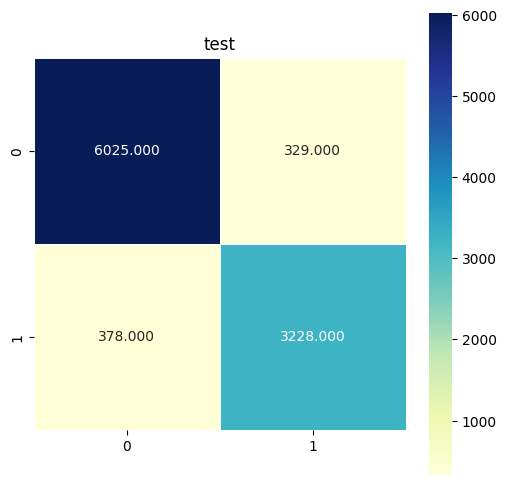

In [67]:
print(conf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("test")

In [68]:
#return fraction of wrong predicted
def perwrong(conf_matrix):
    return 1-(np.sum(conf_matrix)-conf_matrix[0,1]-conf_matrix[1,0])/np.sum(conf_matrix)

In [70]:
#percentage wrong as measure
#got a little worse for the last 50% addition of more games 
train_wrong=perwrong(conf_train)
print(train_wrong)
test_wrong=perwrong(conf_test)
print(test_wrong)

0.02608925970070186
0.0709839357429719


There is some overfitting, but it is relevant improvemnt, but need to look on confusion matrix.

Testing do_xgb_class

In [71]:
ar=do_xgb_class(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9],df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],max_depth=5,reg=10)
print(ar)

xgb took 0.2264 seconds
percentage wrong test 6.84
percentage wrong train 6.09 
[10.          5.          0.06088993  0.06844641]


In [72]:
#do 1 to 8 always since sample changes often and it is fats enouygh
for i in range(1,9):
    loop_reg(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9], df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],i,0.1,1.414,20,'take_open_human_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1648 seconds
percentage wrong test 7.3
percentage wrong train 7.05 
doing case 1
xgb took 0.0906 seconds
percentage wrong test 7.33
percentage wrong train 7.05 
doing case 2
xgb took 0.0762 seconds
percentage wrong test 7.33
percentage wrong train 7.05 
doing case 3
xgb took 0.0925 seconds
percentage wrong test 7.32
percentage wrong train 7.05 
doing case 4
xgb took 0.0768 seconds
percentage wrong test 7.31
percentage wrong train 7.05 
doing case 5
xgb took 0.0899 seconds
percentage wrong test 7.3
percentage wrong train 7.05 
doing case 6
xgb took 0.075 seconds
percentage wrong test 7.29
percentage wrong train 7.06 
doing case 7
xgb took 0.0879 seconds
percentage wrong test 7.33
percentage wrong train 7.05 
doing case 8
xgb took 0.0737 seconds
percentage wrong test 7.35
percentage wrong train 7.09 
doing case 9
xgb took 0.088 seconds
percentage wrong test 7.33
percentage wrong train 7.07 
doing case 10
xgb took 0.1023 seconds
percentage wrong test 7.34
percentag

xgb took 0.2853 seconds
percentage wrong test 6.36
percentage wrong train 4.24 
doing case 9
xgb took 0.3338 seconds
percentage wrong test 6.25
percentage wrong train 4.4 
doing case 10
xgb took 0.2843 seconds
percentage wrong test 6.17
percentage wrong train 4.57 
doing case 11
xgb took 0.2497 seconds
percentage wrong test 6.46
percentage wrong train 5.21 
doing case 12
xgb took 0.201 seconds
percentage wrong test 6.62
percentage wrong train 5.67 
doing case 13
xgb took 0.1988 seconds
percentage wrong test 6.75
percentage wrong train 6.08 
doing case 14
xgb took 0.1562 seconds
percentage wrong test 6.86
percentage wrong train 6.24 
doing case 15
xgb took 0.1597 seconds
percentage wrong test 6.89
percentage wrong train 6.34 
doing case 16
xgb took 0.1674 seconds
percentage wrong test 7.05
percentage wrong train 6.56 
doing case 17
xgb took 0.1357 seconds
percentage wrong test 7.25
percentage wrong train 6.8 
doing case 18
xgb took 0.1403 seconds
percentage wrong test 7.35
percentage wr

Text(0, 0.5, '% wrong')

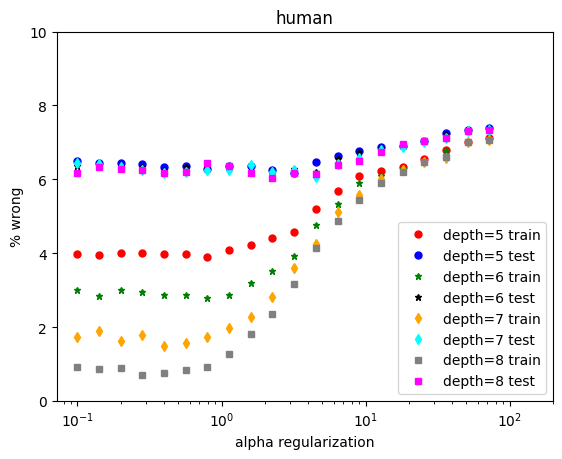

In [73]:
take5=np.loadtxt('take_open_human_xgb_depth5.txt')
take6=np.loadtxt('take_open_human_xgb_depth6.txt')
take7=np.loadtxt('take_open_human_xgb_depth7.txt')
take8=np.loadtxt('take_open_human_xgb_depth8.txt')
plt.plot(take5[0,:],100*take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5[0,:],100*take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6[0,:],100*take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6[0,:],100*take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7[0,:],100*take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7[0,:],100*take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8[0,:],100*take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8[0,:],100*take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

The differences in test seem to be very small, besides that beyound some regularization it gets worse. Not clear what is bets, should also look into logistic.

Now looking on games being only in training or test or in both.

In [74]:
#now separating test and train by separate games 
#2 old data set new 2b 
for i in range(1,9):
    loop_reg(df_hum_feature_train2,df_hum_target_train2,df_hum_feature_test2,df_hum_target_test2,i,0.1,1.414,30,'take_open_hum2b_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1427 seconds
percentage wrong test 7.6
percentage wrong train 6.92 
doing case 1
xgb took 0.1045 seconds
percentage wrong test 7.6
percentage wrong train 6.93 
doing case 2
xgb took 0.0791 seconds
percentage wrong test 7.6
percentage wrong train 6.93 
doing case 3
xgb took 0.0932 seconds
percentage wrong test 7.55
percentage wrong train 6.94 
doing case 4
xgb took 0.0733 seconds
percentage wrong test 7.57
percentage wrong train 6.94 
doing case 5
xgb took 0.0916 seconds
percentage wrong test 7.57
percentage wrong train 6.95 
doing case 6
xgb took 0.0914 seconds
percentage wrong test 7.57
percentage wrong train 6.94 
doing case 7
xgb took 0.091 seconds
percentage wrong test 7.6
percentage wrong train 6.97 
doing case 8
xgb took 0.076 seconds
percentage wrong test 7.61
percentage wrong train 6.95 
doing case 9
xgb took 0.0776 seconds
percentage wrong test 7.61
percentage wrong train 6.95 
doing case 10
xgb took 0.0807 seconds
percentage wrong test 7.61
percentage 

xgb took 0.0962 seconds
percentage wrong test 7.95
percentage wrong train 7.22 
doing case 29
xgb took 0.0769 seconds
percentage wrong test 37.06
percentage wrong train 36.91 
doing case 0
xgb took 0.2074 seconds
percentage wrong test 6.77
percentage wrong train 4.69 
doing case 1
xgb took 0.2383 seconds
percentage wrong test 6.85
percentage wrong train 4.81 
doing case 2
xgb took 0.2207 seconds
percentage wrong test 6.77
percentage wrong train 4.67 
doing case 3
xgb took 0.2015 seconds
percentage wrong test 6.62
percentage wrong train 4.81 
doing case 4
xgb took 0.2202 seconds
percentage wrong test 6.65
percentage wrong train 4.74 
doing case 5
xgb took 0.2716 seconds
percentage wrong test 6.59
percentage wrong train 4.79 
doing case 6
xgb took 0.2287 seconds
percentage wrong test 6.65
percentage wrong train 4.66 
doing case 7
xgb took 0.2287 seconds
percentage wrong test 6.7
percentage wrong train 4.81 
doing case 8
xgb took 0.2086 seconds
percentage wrong test 6.67
percentage wrong 

xgb took 0.1059 seconds
percentage wrong test 7.95
percentage wrong train 7.22 
doing case 27
xgb took 0.0867 seconds
percentage wrong test 7.95
percentage wrong train 7.22 
doing case 28
xgb took 0.0967 seconds
percentage wrong test 7.95
percentage wrong train 7.22 
doing case 29
xgb took 0.0785 seconds
percentage wrong test 37.06
percentage wrong train 36.91 
doing case 0
xgb took 0.3427 seconds
percentage wrong test 6.64
percentage wrong train 1.71 
doing case 1
xgb took 0.3552 seconds
percentage wrong test 6.38
percentage wrong train 1.5 
doing case 2
xgb took 0.3551 seconds
percentage wrong test 6.52
percentage wrong train 1.69 
doing case 3
xgb took 0.347 seconds
percentage wrong test 6.58
percentage wrong train 1.73 
doing case 4
xgb took 0.3728 seconds
percentage wrong test 6.4
percentage wrong train 1.51 
doing case 5
xgb took 0.3752 seconds
percentage wrong test 6.64
percentage wrong train 1.69 
doing case 6
xgb took 0.3563 seconds
percentage wrong test 6.49
percentage wrong 

Text(0, 0.5, '% wrong')

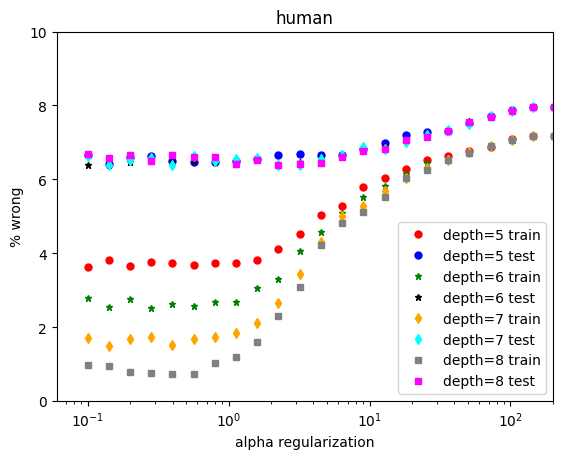

In [76]:
take5b=np.loadtxt('take_open_hum2b_xgb_depth5.txt')
take6b=np.loadtxt('take_open_hum2b_xgb_depth6.txt')
take7b=np.loadtxt('take_open_hum2b_xgb_depth7.txt')
take8b=np.loadtxt('take_open_hum2b_xgb_depth8.txt')
plt.plot(take5b[0,:],100*take5b[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5b[0,:],100*take5b[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6b[0,:],100*take6b[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6b[0,:],100*take6b[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7b[0,:],100*take7b[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7b[0,:],100*take7b[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8b[0,:],100*take8b[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8b[0,:],100*take8b[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Some change similar as for win below, still no clear minimum, still less free paramter should be betetr in general but I should add logistic also since that is easier to extrapolate outside the tested area. 


Now looking on winning.

In [77]:
for i in range(1,9):
    loop_reg(df_win_train.iloc[:,0:9],df_win_train.iloc[:,9], df_win_test.iloc[:,0:9],df_win_test.iloc[:,9],i,0.1,1.414,20,'take_open_win_xgb_b_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1563 seconds
percentage wrong test 7.69
percentage wrong train 7.62 
doing case 1
xgb took 0.0915 seconds
percentage wrong test 7.67
percentage wrong train 7.62 
doing case 2
xgb took 0.0765 seconds
percentage wrong test 7.69
percentage wrong train 7.66 
doing case 3
xgb took 0.0928 seconds
percentage wrong test 7.67
percentage wrong train 7.63 
doing case 4
xgb took 0.0842 seconds
percentage wrong test 7.67
percentage wrong train 7.63 
doing case 5
xgb took 0.1169 seconds
percentage wrong test 7.67
percentage wrong train 7.62 
doing case 6
xgb took 0.0925 seconds
percentage wrong test 7.68
percentage wrong train 7.65 
doing case 7
xgb took 0.1059 seconds
percentage wrong test 7.66
percentage wrong train 7.65 
doing case 8
xgb took 0.0929 seconds
percentage wrong test 7.69
percentage wrong train 7.65 
doing case 9
xgb took 0.0993 seconds
percentage wrong test 7.72
percentage wrong train 7.65 
doing case 10
xgb took 0.0759 seconds
percentage wrong test 7.71
perce

xgb took 0.381 seconds
percentage wrong test 6.75
percentage wrong train 4.29 
doing case 9
xgb took 0.3284 seconds
percentage wrong test 6.93
percentage wrong train 4.54 
doing case 10
xgb took 0.3575 seconds
percentage wrong test 6.9
percentage wrong train 4.77 
doing case 11
xgb took 0.3172 seconds
percentage wrong test 6.91
percentage wrong train 5.23 
doing case 12
xgb took 0.2876 seconds
percentage wrong test 6.88
percentage wrong train 5.78 
doing case 13
xgb took 0.2359 seconds
percentage wrong test 6.99
percentage wrong train 6.3 
doing case 14
xgb took 0.2138 seconds
percentage wrong test 7.25
percentage wrong train 6.66 
doing case 15
xgb took 0.1916 seconds
percentage wrong test 7.25
percentage wrong train 7.02 
doing case 16
xgb took 0.157 seconds
percentage wrong test 7.47
percentage wrong train 7.32 
doing case 17
xgb took 0.2111 seconds
percentage wrong test 7.59
percentage wrong train 7.41 
doing case 18
xgb took 0.1543 seconds
percentage wrong test 7.59
percentage wro

In [78]:

#now separating test and train by separate games
#b is using more games
for i in range(1,9):
    loop_reg(df_win_feature_train2,df_win_target_train2, df_win_feature_test2,df_win_target_test2,i,0.1,1.414,30,'take_open_win2b_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1149 seconds
percentage wrong test 8.0
percentage wrong train 7.54 
doing case 1
xgb took 0.0902 seconds
percentage wrong test 8.0
percentage wrong train 7.55 
doing case 2
xgb took 0.1213 seconds
percentage wrong test 8.0
percentage wrong train 7.55 
doing case 3
xgb took 0.1265 seconds
percentage wrong test 8.02
percentage wrong train 7.56 
doing case 4
xgb took 0.1063 seconds
percentage wrong test 8.02
percentage wrong train 7.57 
doing case 5
xgb took 0.088 seconds
percentage wrong test 8.02
percentage wrong train 7.56 
doing case 6
xgb took 0.1037 seconds
percentage wrong test 8.02
percentage wrong train 7.56 
doing case 7
xgb took 0.0927 seconds
percentage wrong test 8.02
percentage wrong train 7.56 
doing case 8
xgb took 0.1175 seconds
percentage wrong test 8.04
percentage wrong train 7.56 
doing case 9
xgb took 0.0915 seconds
percentage wrong test 8.02
percentage wrong train 7.56 
doing case 10
xgb took 0.1014 seconds
percentage wrong test 8.02
percentag

xgb took 0.1253 seconds
percentage wrong test 8.35
percentage wrong train 7.76 
doing case 29
xgb took 0.1061 seconds
percentage wrong test 36.2
percentage wrong train 36.3 
doing case 0
xgb took 0.2573 seconds
percentage wrong test 7.08
percentage wrong train 5.36 
doing case 1
xgb took 0.2547 seconds
percentage wrong test 7.19
percentage wrong train 5.38 
doing case 2
xgb took 0.255 seconds
percentage wrong test 7.06
percentage wrong train 5.4 
doing case 3
xgb took 0.2713 seconds
percentage wrong test 7.0
percentage wrong train 5.37 
doing case 4
xgb took 0.249 seconds
percentage wrong test 7.08
percentage wrong train 5.46 
doing case 5
xgb took 0.257 seconds
percentage wrong test 7.11
percentage wrong train 5.54 
doing case 6
xgb took 0.2515 seconds
percentage wrong test 7.12
percentage wrong train 5.3 
doing case 7
xgb took 0.2512 seconds
percentage wrong test 7.21
percentage wrong train 5.42 
doing case 8
xgb took 0.2571 seconds
percentage wrong test 7.23
percentage wrong train 5

xgb took 0.17 seconds
percentage wrong test 8.35
percentage wrong train 7.76 
doing case 27
xgb took 0.1444 seconds
percentage wrong test 8.35
percentage wrong train 7.76 
doing case 28
xgb took 0.3715 seconds
percentage wrong test 8.35
percentage wrong train 7.76 
doing case 29
xgb took 0.2303 seconds
percentage wrong test 36.2
percentage wrong train 36.3 
doing case 0
xgb took 1.0624 seconds
percentage wrong test 7.02
percentage wrong train 1.2 
doing case 1
xgb took 0.7592 seconds
percentage wrong test 7.03
percentage wrong train 1.16 
doing case 2
xgb took 0.6154 seconds
percentage wrong test 7.19
percentage wrong train 1.08 
doing case 3
xgb took 0.5783 seconds
percentage wrong test 7.05
percentage wrong train 1.13 
doing case 4
xgb took 0.6195 seconds
percentage wrong test 7.01
percentage wrong train 0.99 
doing case 5
xgb took 0.6048 seconds
percentage wrong test 7.09
percentage wrong train 1.11 
doing case 6
xgb took 0.6841 seconds
percentage wrong test 6.98
percentage wrong tr

Clearly different bevahiour, test is worse than before at least for small reguluarization. Is likely too extreme to use it since the samplies in it are not randomly ordered (Different computer strategy and also human strategies change likely). I just scramble them in the list. 

Text(0, 0.5, '% wrong')

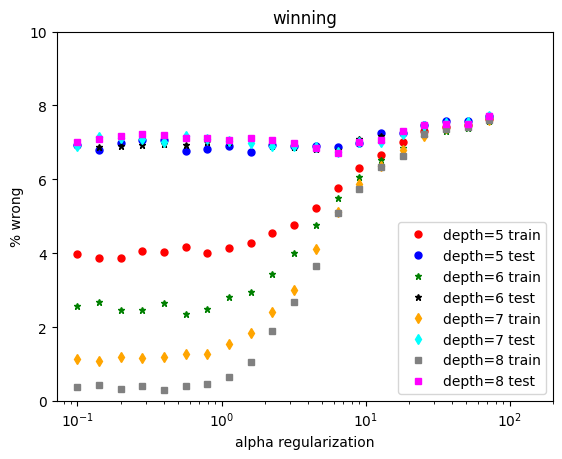

In [79]:
wtake5=np.loadtxt('take_open_win_xgb_b_depth5.txt')
wtake6=np.loadtxt('take_open_win_xgb_b_depth6.txt')
wtake7=np.loadtxt('take_open_win_xgb_b_depth7.txt')
wtake8=np.loadtxt('take_open_win_xgb_b_depth8.txt')
plt.plot(wtake5[0,:],100*wtake5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wtake5[0,:],100*wtake5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wtake6[0,:],100*wtake6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wtake6[0,:],100*wtake6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wtake7[0,:],100*wtake7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wtake7[0,:],100*wtake7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wtake8[0,:],100*wtake8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wtake8[0,:],100*wtake8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Here at least variance seems to get smaller around a regularziation of 2 maybe indicating that this is the best one. That now changed after adding games, 9 seems best now. 

That was before rerun with slightly larger sample, thus different split, now it looks different again. 

In general it is likely that the sample is too small to be very reliable, also likely the different data sets are likely too much correlated due to sharing states. 

Text(0, 0.5, '% wrong')

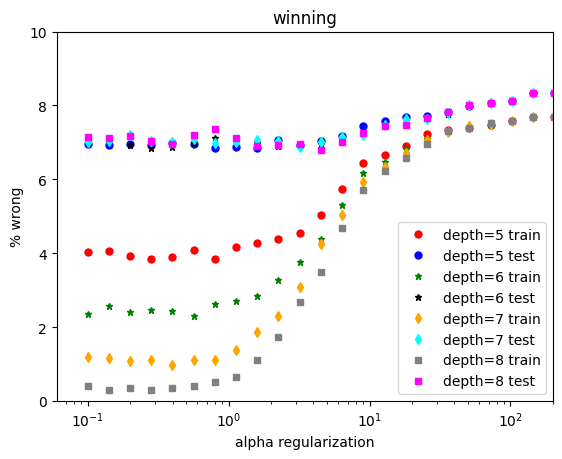

In [80]:
w2take5=np.loadtxt('take_open_win2b_xgb_depth5.txt')
w2take6=np.loadtxt('take_open_win2b_xgb_depth6.txt')
w2take7=np.loadtxt('take_open_win2b_xgb_depth7.txt')
w2take8=np.loadtxt('take_open_win2b_xgb_depth8.txt')
plt.plot(w2take5[0,:],100*w2take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(w2take5[0,:],100*w2take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(w2take6[0,:],100*w2take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(w2take6[0,:],100*w2take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(w2take7[0,:],100*w2take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(w2take7[0,:],100*w2take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(w2take8[0,:],100*w2take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(w2take8[0,:],100*w2take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Now bigger differences at least depth 5 looks worse now and also depth 6 needs smaller regularization.

Now with different split it loos even less clear, only really large regulraization is disfavored. 

Since the scatter is partly random, a single dip is likely that and should be ignored. 
There is still no clear minimum. 


Now looking on logistic regression.


[[9055  565]
 [ 695 4787]]


(<AxesSubplot:title={'center':'Logistic train'}>,
 Text(0.5, 1.0, 'Logistic train'))

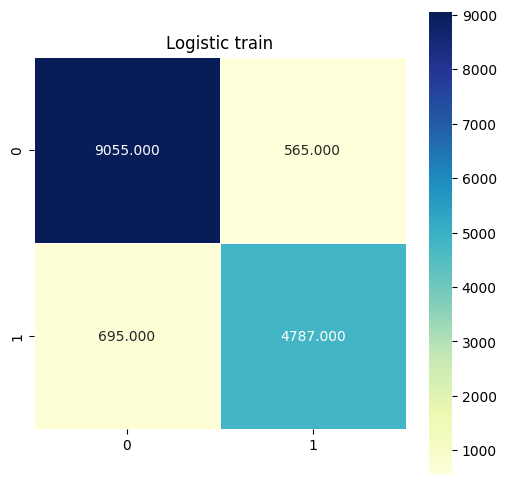

In [81]:
#a few nan remove
df_win_feature_train2[df_win_feature_train2.isnull()]=0
df_win_feature_test2[df_win_feature_test2.isnull()]=0
df_win_target_train2[df_win_target_train2.isnull()]=0
df_win_target_test2[df_win_target_test2.isnull()]=0
lopen1=LogisticRegression().fit(df_win_feature_train2,df_win_target_train2)
lpred_te=lopen1.predict(df_win_feature_test2)
lpred_tr=lopen1.predict(df_win_feature_train2)
lconf_train = confusion_matrix(df_win_target_train2, lpred_tr)
lconf_test = confusion_matrix(df_win_target_test2, lpred_te)
print(lconf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic train")

[[5964  390]
 [ 461 3145]]


(<AxesSubplot:title={'center':'Logistic test'}>,
 Text(0.5, 1.0, 'Logistic test'))

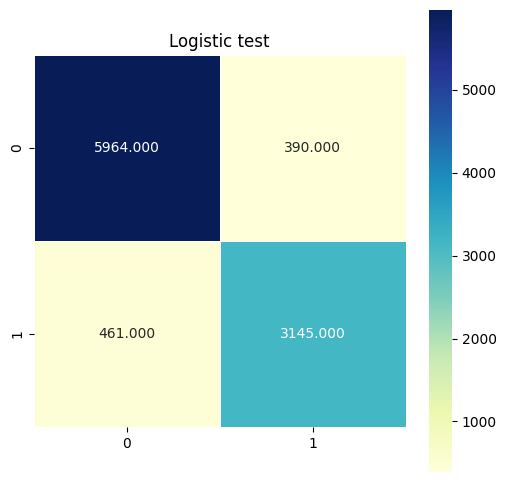

In [82]:

print(lconf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic test")

In [83]:
#old games number was
#XGBoost standard
#wrong in train: 1.67 %
#wrong in test: 6.75 %
#Logistic standard
#wrong in train: 9.15 %
#wrong in test: 8.08 %
print("XGBoost standard")
print(f"wrong in train: {round(100*train_wrong,2)} %")
print(f"wrong in test: {round(100*test_wrong,2)} %")
ltest_wrong=perwrong(lconf_test)
ltrain_wrong=perwrong(lconf_train)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong,2)} %")
print(f"wrong in test: {round(100*ltest_wrong,2)} %")

XGBoost standard
wrong in train: 2.61 %
wrong in test: 7.1 %
Logistic standard
wrong in train: 8.34 %
wrong in test: 8.54 %


Now adding regularization. 

In [84]:
for i in range(10):
    c=0.0001*10**i
    lopen2=LogisticRegression(penalty='l2',C=c).fit(df_win_feature_train2,df_win_target_train2)
    lpred_te2=lopen2.predict(df_win_feature_test2)
    lpred_tr2=lopen2.predict(df_win_feature_train2)
    lconf_train2 = confusion_matrix(df_win_target_train2, lpred_tr2)
    lconf_test2 = confusion_matrix(df_win_target_test2, lpred_te2)
    ltest_wrong2=perwrong(lconf_test2)
    ltrain_wrong2=perwrong(lconf_train2)
    print(f"Logistic regularized with c={c}")
    print(f"wrong in train: {round(100*ltrain_wrong2,2)} %")
    print(f"wrong in test: {round(100*ltest_wrong2,2)} %")

Logistic regularized with c=0.0001
wrong in train: 9.65 %
wrong in test: 9.75 %
Logistic regularized with c=0.001
wrong in train: 8.42 %
wrong in test: 8.49 %
Logistic regularized with c=0.01
wrong in train: 8.29 %
wrong in test: 8.46 %
Logistic regularized with c=0.1
wrong in train: 8.36 %
wrong in test: 8.55 %
Logistic regularized with c=1.0
wrong in train: 8.34 %
wrong in test: 8.54 %
Logistic regularized with c=10.0
wrong in train: 8.34 %
wrong in test: 8.54 %
Logistic regularized with c=100.0
wrong in train: 8.34 %
wrong in test: 8.54 %
Logistic regularized with c=1000.0
wrong in train: 8.34 %
wrong in test: 8.54 %
Logistic regularized with c=10000.0
wrong in train: 8.34 %
wrong in test: 8.54 %
Logistic regularized with c=100000.0
wrong in train: 8.34 %
wrong in test: 8.54 %


Small variation for larger c, just a small improvement possible in test and train which is probably because the metric is not the same as used by the regression. Is not more followed here, since there does not seem overfitting because less are wrong in test. Now  alittle mroe a worse in test but not many. Logisictic is less good
than xgboost but not by much, thus it is used for now. 

I am now looking on coefficent to be able to implement it myself. 

In [85]:
print(lopen1.coef_,lopen1.intercept_)
#old ones were [[-1.1564831  -0.09591479 -0.17654283  0.06124354  0.08596344 -0.14850562
#  -0.20324485  0.01521082  0.00277937]] [8.30847225]

[[-1.14574741 -0.06623363 -0.12634143  0.05482527  0.03289027 -0.11501194
  -0.22694921  0.02085282 -0.01256042]] [8.02503196]


In [86]:
def logistic_function2(coef,intercept,data):
    res=1/(1+np.exp(-intercept-np.matmul(coef,data)))
    return res

In [88]:
print(df_win_feature_train2.iloc[0,:].shape)
print(logistic_function2(lopen1.coef_,lopen1.intercept_,df_win_feature_train2.iloc[0,:]))
print(df_win_feature_train2.iloc[100,:],df_win_target_train2.iloc[0],lpred_tr[0])
#now loop on many
for i in range(df_win_feature_train2.shape[0]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,df_win_feature_train2.iloc[i,:])
    if np.round(res)!=lpred_tr[i]:
        print("problem for")
        print(i,res,lpred_tr[i])

(9,)
[0.00115163]
open_pile_card            9.0
own_n_closed              1.0
own_n_open               11.0
own_sum                  37.0
own_max                  12.0
other_player_n_closed     4.0
other_player_n_open       8.0
other_player_sum         27.0
other_player_max         10.0
Name: 207, dtype: float64 0.0 0.0


Works fine. 

Looking on probabilities of extreme cases and mean for the others. 


In [89]:
for i in range(df_win_feature_train2.shape[1]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    dat=np.zeros(9)
    for j in range(9):
        dat[j]=df_win_feature_train2.iloc[:,j].mean()
        if j==i:    
            print(f"min of {df_hum_feature_train2.columns[i%9]}")
            dat[j]=df_win_feature_train2.iloc[:,j].min()
    print(dat)    
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,dat)
    print(f"p take open is {np.round(res[0],4)}")    
    for j in range(9):
        dat[j]=df_win_feature_train2.iloc[:,j].mean()
        if j==i:
            print(f"max of {df_hum_feature_train2.columns[i%9]}")
            dat[j]=df_win_feature_train2.iloc[:,j].max()        
    print(dat)    
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,dat)
    print(f"p take open is {np.round(res[0],4)}")
    

min of open_pile_card
[-2.          5.50913786  5.92510926 13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.9998
max of open_pile_card
[12.          5.50913786  5.92510926 13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.0005
min of own_n_closed
[ 6.59627864  1.          5.92510926 13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.2321
max of own_n_closed
[ 6.59627864 10.          5.92510926 13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.1428
min of own_n_open
[ 6.59627864  5.50913786  0.         13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.3216
max of own_n_open
[ 6.59627864  5.50913786 11.         13.6207787   5.91709707  6.65997881
  5.23136008 11.45484042  6.03814064]
p take open is 0.1056
min of own_sum
[ 6.59627864  5.50913786  5.92510926 -8.          5.91709707  6.659

In [92]:
allpar=np.zeros((10))
allpar[0]=lopen1.intercept_
allpar[1:10]=lopen1.coef_
print(allpar)
#check speed
starttime=time.time()
for i in range(df_win_feature_train2.shape[0]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    res=logistic_function2(allpar[1:10],allpar[0],df_win_feature_train2.iloc[i,:])    
    if i==0:
        print(res)
stoptime=time.time()
print(f"took {round(stoptime-starttime,4)} seconds for {df_win_feature_train2.shape[0]} operations")
#noe not overwritten used traing set of 10148 
#np.savetxt("logis_par_take_open_v1.txt",allpar)
#version2 now used training set of 15037
#np.savetxt("logis_par_take_open_v2.txt",allpar)

[ 8.02503196 -1.14574741 -0.06623363 -0.12634143  0.05482527  0.03289027
 -0.11501194 -0.22694921  0.02085282 -0.01256042]
0.0011516255259575573
took 1.7378 seconds for 15102 operations


In [93]:
#nopw using the file output as input
def logistic_function(coefs,data):
    res=1/(1+np.exp(-coefs[0]-np.matmul(coefs[1:coefs.shape[0]],data)))
    return res

In [94]:
coefs=np.loadtxt("logis_par_take_open_v1.txt")
#testing it 
res=logistic_function(coefs,df_win_feature_train2.iloc[0,:])
print(res)

0.0014488012329168182


Speed is o.k. could be faster but unlikely will matter compared to the other loops even less since only one application per turn is needed no simulation. 

Text(0, 0.5, 'feature importance')

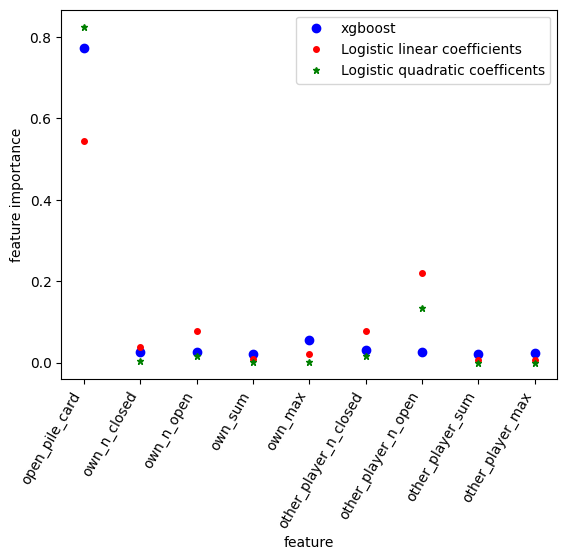

In [95]:

resl=np.zeros((4,9))
for i in range(9):
    resl[0,i]=np.std(df_hum_feature_train2.iloc[:,i])
    resl[1,i]=1/resl[0,i]*lopen1.coef_[0,i]
#relative importance    
resl[2]=abs(resl[1])/sum(abs(resl[1]))    
resl[3]=abs(resl[1]**2)/sum(abs(resl[1]**2)) 
#using coefficents my self sigmoid( dot([val1, val2, 2], lr.coef_.T) )
plt.plot(df_hum_feature_train2.columns,open1.feature_importances_,'o',ms=6,color='blue',label='xgboost') 
plt.plot(df_hum_feature_train2.columns,resl[2],'o',ms=4,color='red',label='Logistic linear coefficients') 
plt.plot(df_hum_feature_train2.columns,resl[3],'*',ms=5,color='green',label='Logistic quadratic coefficents') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")

As expected open card value is the most important one. That is is similar for logistic and xgboost. 

Logistic is worse than xgboost. The difference is much bigger in train but still clear also in test. Likely some non linearity causes it.
Later feature enegreing will be explored to improve it, but for now I just concentrate on xgboost. 

Now looking on action discard, only cases which are not taken open are considered since the others are trivially 0.

In [96]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_discard,df_hum_target_train2_discard,df_hum_feature_test2_discard,df_hum_target_test2_discard,i,0.1,1.414,30,'discard_hum2_xgb_b_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.0827 seconds
percentage wrong test 8.26
percentage wrong train 7.56 
doing case 1
xgb took 0.0508 seconds
percentage wrong test 8.21
percentage wrong train 7.51 
doing case 2
xgb took 0.064 seconds
percentage wrong test 8.21
percentage wrong train 7.53 
doing case 3
xgb took 0.0531 seconds
percentage wrong test 8.21
percentage wrong train 7.53 
doing case 4
xgb took 0.0494 seconds
percentage wrong test 8.24
percentage wrong train 7.48 
doing case 5
xgb took 0.0642 seconds
percentage wrong test 8.24
percentage wrong train 7.53 
doing case 6
xgb took 0.0524 seconds
percentage wrong test 8.28
percentage wrong train 7.53 
doing case 7
xgb took 0.0692 seconds
percentage wrong test 8.28
percentage wrong train 7.56 
doing case 8
xgb took 0.0663 seconds
percentage wrong test 8.24
percentage wrong train 7.56 
doing case 9
xgb took 0.0514 seconds
percentage wrong test 8.26
percentage wrong train 7.56 
doing case 10
xgb took 0.0505 seconds
percentage w

xgb took 0.0598 seconds
percentage wrong test 8.47
percentage wrong train 8.34 
doing case 29
xgb took 0.0508 seconds
percentage wrong test 42.5
percentage wrong train 43.18 
doing max depth of 4
doing case 0
xgb took 0.1325 seconds
percentage wrong test 7.27
percentage wrong train 3.99 
doing case 1
xgb took 0.1279 seconds
percentage wrong test 7.25
percentage wrong train 4.14 
doing case 2
xgb took 0.1377 seconds
percentage wrong test 7.2
percentage wrong train 4.14 
doing case 3
xgb took 0.1289 seconds
percentage wrong test 7.22
percentage wrong train 3.91 
doing case 4
xgb took 0.1457 seconds
percentage wrong test 7.28
percentage wrong train 4.09 
doing case 5
xgb took 0.1345 seconds
percentage wrong test 7.27
percentage wrong train 4.07 
doing case 6
xgb took 0.1413 seconds
percentage wrong test 7.3
percentage wrong train 3.88 
doing case 7
xgb took 0.1681 seconds
percentage wrong test 7.22
percentage wrong train 4.15 
doing case 8
xgb took 0.1569 seconds
percentage wrong test 7.1

xgb took 0.1892 seconds
percentage wrong test 8.47
percentage wrong train 8.34 
doing case 27
xgb took 0.0942 seconds
percentage wrong test 8.47
percentage wrong train 8.34 
doing case 28
xgb took 0.2185 seconds
percentage wrong test 8.47
percentage wrong train 8.34 
doing case 29
xgb took 0.1058 seconds
percentage wrong test 42.5
percentage wrong train 43.18 
doing max depth of 7
doing case 0
xgb took 0.6105 seconds
percentage wrong test 7.35
percentage wrong train 0.3 
doing case 1
xgb took 0.7828 seconds
percentage wrong test 7.17
percentage wrong train 0.42 
doing case 2
xgb took 0.7133 seconds
percentage wrong test 7.17
percentage wrong train 0.37 
doing case 3
xgb took 0.6618 seconds
percentage wrong test 7.15
percentage wrong train 0.55 
doing case 4
xgb took 0.4122 seconds
percentage wrong test 6.98
percentage wrong train 0.29 
doing case 5
xgb took 0.6275 seconds
percentage wrong test 7.33
percentage wrong train 0.38 
doing case 6
xgb took 0.4362 seconds
percentage wrong test 

Text(0, 0.5, '% wrong')

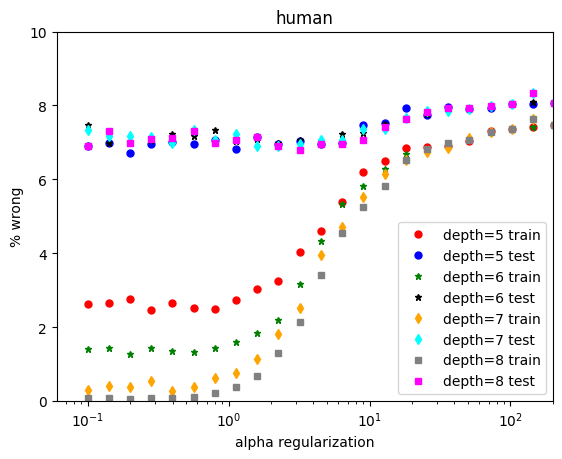

In [97]:
hdis5=np.loadtxt('discard_hum2_xgb_b_depth5.txt')
hdis6=np.loadtxt('discard_hum2_xgb_b_depth6.txt')
hdis7=np.loadtxt('discard_hum2_xgb_b_depth7.txt')
hdis8=np.loadtxt('discard_hum2_xgb_b_depth8.txt')
plt.plot(hdis5[0,:],100*hdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hdis5[0,:],100*hdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hdis6[0,:],100*hdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hdis6[0,:],100*hdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hdis7[0,:],100*hdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hdis7[0,:],100*hdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hdis8[0,:],100*hdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hdis8[0,:],100*hdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Similar as before differences are small, likely it is not very important which one is chosen. 

In [98]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_discard,df_win_target_train2_discard,df_win_feature_test2_discard,df_win_target_test2_discard,i,0.1,1.414,30,'discard_win2_b_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.133 seconds
percentage wrong test 11.0
percentage wrong train 9.81 
doing case 1
xgb took 0.0681 seconds
percentage wrong test 10.92
percentage wrong train 9.72 
doing case 2
xgb took 0.0505 seconds
percentage wrong test 10.88
percentage wrong train 9.79 
doing case 3
xgb took 0.0486 seconds
percentage wrong test 10.92
percentage wrong train 9.8 
doing case 4
xgb took 0.0659 seconds
percentage wrong test 10.88
percentage wrong train 9.78 
doing case 5
xgb took 0.0508 seconds
percentage wrong test 10.91
percentage wrong train 9.8 
doing case 6
xgb took 0.0727 seconds
percentage wrong test 10.99
percentage wrong train 9.82 
doing case 7
xgb took 0.0877 seconds
percentage wrong test 11.02
percentage wrong train 9.85 
doing case 8
xgb took 0.0546 seconds
percentage wrong test 11.03
percentage wrong train 9.83 
doing case 9
xgb took 0.0485 seconds
percentage wrong test 10.95
percentage wrong train 9.84 
doing case 10
xgb took 0.0697 seconds
perce

percentage wrong test 12.39
percentage wrong train 11.56 
doing case 28
xgb took 0.056 seconds
percentage wrong test 39.38
percentage wrong train 39.83 
doing case 29
xgb took 0.047 seconds
percentage wrong test 39.38
percentage wrong train 39.83 
doing max depth of 4
doing case 0
xgb took 0.1507 seconds
percentage wrong test 8.7
percentage wrong train 5.37 
doing case 1
xgb took 0.1234 seconds
percentage wrong test 9.08
percentage wrong train 5.17 
doing case 2
xgb took 0.1435 seconds
percentage wrong test 8.8
percentage wrong train 5.09 
doing case 3
xgb took 0.1227 seconds
percentage wrong test 9.08
percentage wrong train 5.08 
doing case 4
xgb took 0.1572 seconds
percentage wrong test 8.81
percentage wrong train 5.14 
doing case 5
xgb took 0.1255 seconds
percentage wrong test 9.0
percentage wrong train 5.3 
doing case 6
xgb took 0.1458 seconds
percentage wrong test 8.94
percentage wrong train 5.28 
doing case 7
xgb took 0.1285 seconds
percentage wrong test 8.94
percentage wrong tra

percentage wrong test 11.95
percentage wrong train 10.61 
doing case 25
xgb took 0.1608 seconds
percentage wrong test 12.18
percentage wrong train 10.65 
doing case 26
xgb took 0.1396 seconds
percentage wrong test 12.42
percentage wrong train 11.42 
doing case 27
xgb took 0.1351 seconds
percentage wrong test 12.4
percentage wrong train 11.42 
doing case 28
xgb took 0.1143 seconds
percentage wrong test 39.38
percentage wrong train 39.83 
doing case 29
xgb took 0.1712 seconds
percentage wrong test 39.38
percentage wrong train 39.83 
doing max depth of 7
doing case 0
xgb took 0.5655 seconds
percentage wrong test 9.1
percentage wrong train 0.4 
doing case 1
xgb took 0.6255 seconds
percentage wrong test 9.16
percentage wrong train 0.59 
doing case 2
xgb took 0.6531 seconds
percentage wrong test 9.14
percentage wrong train 0.53 
doing case 3
xgb took 0.3924 seconds
percentage wrong test 9.03
percentage wrong train 0.56 
doing case 4
xgb took 0.4659 seconds
percentage wrong test 9.38
percenta

Text(0, 0.5, '% wrong')

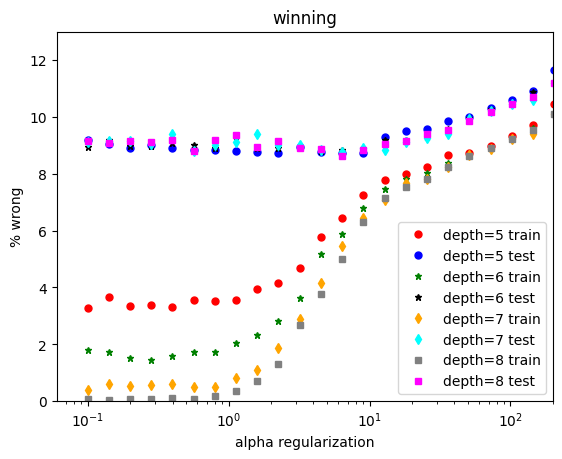

In [99]:
wdis5=np.loadtxt('discard_win2_b_xgb_depth5.txt')
wdis6=np.loadtxt('discard_win2_b_xgb_depth6.txt')
wdis7=np.loadtxt('discard_win2_b_xgb_depth7.txt')
wdis8=np.loadtxt('discard_win2_b_xgb_depth8.txt')
plt.plot(wdis5[0,:],100*wdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wdis5[0,:],100*wdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wdis6[0,:],100*wdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wdis6[0,:],100*wdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wdis7[0,:],100*wdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wdis7[0,:],100*wdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wdis8[0,:],100*wdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wdis8[0,:],100*wdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,13)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

There seems to be a minimum, for depth 8, regularization of 9. 
But changes with random draw. It is now getting more clear with 15000 operations in train. 

Now looking on logistic regression. 


In [100]:
#a few nan remove
df_win_feature_train2_discard[df_win_feature_train2_discard.isnull()]=0
df_win_feature_test2_discard[df_win_feature_test2_discard.isnull()]=0
df_win_target_train2_discard[df_win_target_train2_discard.isnull()]=0
df_win_target_test2_discard[df_win_target_test2_discard.isnull()]=0
lopen1_dis=LogisticRegression().fit(df_win_feature_train2_discard,df_win_target_train2_discard)
lpred_te_dis=lopen1_dis.predict(df_win_feature_test2_discard)
lpred_tr_dis=lopen1_dis.predict(df_win_feature_train2_discard)
lconf_train_dis = confusion_matrix(df_win_target_train2_discard, lpred_tr_dis)
lconf_test_dis = confusion_matrix(df_win_target_test2_discard, lpred_te_dis)

In [101]:
#old 
#Logistic standard
#wrong in train: 13.24 %
#wrong in test: 14.08 %

ltest_wrong_dis=perwrong(lconf_test_dis)
ltrain_wrong_dis=perwrong(lconf_train_dis)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong_dis,2)} %")
print(f"wrong in test: {round(100*ltest_wrong_dis,2)} %")

Logistic standard
wrong in train: 13.52 %
wrong in test: 15.28 %


Worse, but also xgboost is worse for discard. Is probably not full effect, but for now, I just want to get something ready. 

In [102]:
#now checking regularization
for i in range(20):
    c=0.001*2**i
    lopen2=LogisticRegression(penalty='l2',C=c).fit(df_win_feature_train2_discard,df_win_target_train2_discard)
    lpred_te2=lopen2.predict(df_win_feature_test2_discard)
    lpred_tr2=lopen2.predict(df_win_feature_train2_discard)
    lconf_train2 = confusion_matrix(df_win_target_train2_discard, lpred_tr2)
    lconf_test2 = confusion_matrix(df_win_target_test2_discard, lpred_te2)
    ltest_wrong2=perwrong(lconf_test2)
    ltrain_wrong2=perwrong(lconf_train2)
    print(f"Logistic regularized with c={c}")
    print(f"wrong in train: {round(100*ltrain_wrong2,2)} %")
    print(f"wrong in test: {round(100*ltest_wrong2,2)} %")

Logistic regularized with c=0.001
wrong in train: 13.93 %
wrong in test: 15.38 %
Logistic regularized with c=0.002
wrong in train: 13.78 %
wrong in test: 15.5 %
Logistic regularized with c=0.004
wrong in train: 13.64 %
wrong in test: 15.42 %
Logistic regularized with c=0.008
wrong in train: 13.56 %
wrong in test: 15.33 %
Logistic regularized with c=0.016
wrong in train: 13.52 %
wrong in test: 15.31 %
Logistic regularized with c=0.032
wrong in train: 13.53 %
wrong in test: 15.28 %
Logistic regularized with c=0.064
wrong in train: 13.54 %
wrong in test: 15.31 %
Logistic regularized with c=0.128
wrong in train: 13.52 %
wrong in test: 15.28 %
Logistic regularized with c=0.256
wrong in train: 13.52 %
wrong in test: 15.28 %
Logistic regularized with c=0.512
wrong in train: 13.52 %
wrong in test: 15.28 %
Logistic regularized with c=1.024
wrong in train: 13.52 %
wrong in test: 15.28 %
Logistic regularized with c=2.048
wrong in train: 13.52 %
wrong in test: 15.28 %
Logistic regularized with c=4

In [ ]:
Exporting the parameters.

In [103]:
allpar=np.zeros((11))
allpar[0]=lopen1_dis.intercept_
allpar[1:12]=lopen1_dis.coef_
print(allpar)
#about 10000 operartions
#[-5.47165449e+00 -5.63543463e-02 -2.16573153e-02  1.22752991e-01 -1.46233007e-02 -3.34293441e-01  3.15214089e-01  1.18527579e-01-1.65286619e-03  1.25478887e-02  6.83374381e-01]
#np.savetxt("logis_par_discard_v1.txt",allpar)
#about 15000 operations
#np.savetxt("logis_par_discard_v2.txt",allpar)

[-6.28691640e+00 -3.22408076e-02  7.87460539e-02  1.82044358e-01
 -1.10810600e-02 -2.92356327e-01  2.93279276e-01  4.10887356e-02
  1.27871694e-04 -2.29493682e-03  6.79295086e-01]


Looking on the behaviour for extreme cases. 

In [104]:

for i in range(df_win_feature_train2_discard.shape[1]):
    dat=np.zeros(10)
    for j in range(10):
        dat[j]=df_win_feature_train2_discard.iloc[:,j].mean()
        if j==i:    
            print(f"min of {df_win_feature_train2_discard.columns[i]}")
            dat[j]=df_win_feature_train2_discard.iloc[:,j].min()
    print(dat)    
    res=logistic_function2(lopen1_dis.coef_,lopen1_dis.intercept_,dat)
    print(f"p discard closed is {np.round(res[0],4)}")    
    for j in range(10):
        dat[j]=df_win_feature_train2_discard.iloc[:,j].mean()
        if j==i:
            print(f"max of {df_win_feature_train2_discard.columns[i]}")
            dat[j]=df_win_feature_train2_discard.iloc[:,j].max()        
    print(dat)    
    res=logistic_function2(lopen1_dis.coef_,lopen1_dis.intercept_,dat)
    print(f"p discard closed is {np.round(res[0],4)}")
    

min of open_pile_card
[-2.          5.52546778  5.95904366 13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard closed is 0.3267
max of open_pile_card
[12.          5.52546778  5.95904366 13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard closed is 0.236
min of own_n_closed
[ 8.70873181  1.          5.95904366 13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard closed is 0.1939
max of own_n_closed
[ 8.70873181 10.          5.95904366 13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard closed is 0.3282
min of own_n_open
[ 8.70873181  5.52546778  0.         13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard closed is 0.104
max of own_n_open
[ 8.70873181  5.52546778 11.         13.48045738  5.8989605   6.63659044
  5.27079002 12.10925156  6.27203742  5.45135135]
p discard


Now looking on which card to take, when closed need to be taken that is ignored. 
This is a regression, and closed has the value of 5.07. That means it is similar to 5, that is not true fully but should be the best approximations for small number of cards. 


In [105]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_value,df_hum_target_train2_value,df_hum_feature_test2_value,df_hum_target_test2_value,i,0.1,1.414,30,'value_hum2_b_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1492 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.6059 points
standard deviation of prediction-train 1.5344 points
doing case 1
xgb took 0.0684 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.6059 points
standard deviation of prediction-train 1.5344 points
doing case 2
xgb took 0.0844 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.6059 points
standard deviation of prediction-train 1.5344 points
doing case 3
xgb took 0.1151 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.6057 points
standard deviation of prediction-train 1.5344 points
doing case 4
xgb took 0.055 seconds
standard deviation of test 2.434 points
standar

xgb took 0.1035 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5425 points
standard deviation of prediction-train 1.4134 points
doing case 9
xgb took 0.0908 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5433 points
standard deviation of prediction-train 1.4134 points
doing case 10
xgb took 0.0928 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5507 points
standard deviation of prediction-train 1.417 points
doing case 11
xgb took 0.0937 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5462 points
standard deviation of prediction-train 1.4172 points
doing case 12
xgb took 0.083 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  poin

xgb took 0.1277 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5141 points
standard deviation of prediction-train 1.3615 points
doing case 16
xgb took 0.1135 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5158 points
standard deviation of prediction-train 1.3694 points
doing case 17
xgb took 0.1178 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5134 points
standard deviation of prediction-train 1.3879 points
doing case 18
xgb took 0.086 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5293 points
standard deviation of prediction-train 1.4141 points
doing case 19
xgb took 0.081 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  poi

xgb took 0.0916 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5553 points
standard deviation of prediction-train 1.4719 points
doing case 23
xgb took 0.082 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5758 points
standard deviation of prediction-train 1.4945 points
doing case 24
xgb took 0.1159 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5923 points
standard deviation of prediction-train 1.5194 points
doing case 25
xgb took 0.074 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.6179 points
standard deviation of prediction-train 1.5557 points
doing case 26
xgb took 0.0719 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  poi

xgb took 0.2443 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.564 points
standard deviation of prediction-train 0.9056 points
doing case 1
xgb took 0.2656 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5485 points
standard deviation of prediction-train 0.9062 points
doing case 2
xgb took 0.3115 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5598 points
standard deviation of prediction-train 0.9134 points
doing case 3
xgb took 0.2729 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.567 points
standard deviation of prediction-train 0.8912 points
doing case 4
xgb took 0.4043 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points


xgb took 0.3699 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5864 points
standard deviation of prediction-train 0.7015 points
doing case 8
xgb took 0.2818 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5987 points
standard deviation of prediction-train 0.7302 points
doing case 9
xgb took 0.2652 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5958 points
standard deviation of prediction-train 0.7177 points
doing case 10
xgb took 0.3155 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5784 points
standard deviation of prediction-train 0.7556 points
doing case 11
xgb took 0.2622 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  poi

xgb took 0.3999 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5601 points
standard deviation of prediction-train 0.8922 points
doing case 15
xgb took 0.2999 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.549 points
standard deviation of prediction-train 1.0033 points
doing case 16
xgb took 0.2776 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5273 points
standard deviation of prediction-train 1.1088 points
doing case 17
xgb took 0.6695 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  points
standard deviation of prediction-test 1.5165 points
standard deviation of prediction-train 1.2365 points
doing case 18
xgb took 0.2331 seconds
standard deviation of test 2.434 points
standard deviation of train 2.355  po

Text(0, 0.5, 'standard deviation [points]')

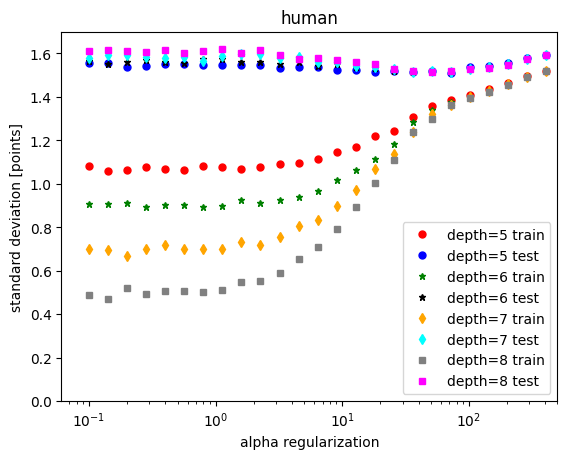

In [106]:
hval5=np.loadtxt('value_hum2_b_xgb_depth5.txt')
hval6=np.loadtxt('value_hum2_b_xgb_depth6.txt')
hval7=np.loadtxt('value_hum2_b_xgb_depth7.txt')
hval8=np.loadtxt('value_hum2_b_xgb_depth8.txt')
plt.plot(hval5[0,:],hval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hval5[0,:],hval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hval6[0,:],hval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hval6[0,:],hval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hval7[0,:],hval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hval7[0,:],hval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hval8[0,:],hval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hval8[0,:],hval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("standard deviation [points]")

Minimum is clearer here than for the classifications. It is understandable that regression is easier than clasfication because it continuous nature has the consequence that for same row number there is more information.

Now winnning case. 

In [107]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_value,df_win_target_train2_value,df_win_feature_test2_value,df_win_target_test2_value,i,0.1,1.414,30,'value_win2_b_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.0886 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5961 points
standard deviation of prediction-train 1.4805 points
doing case 1
xgb took 0.0719 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5961 points
standard deviation of prediction-train 1.4805 points
doing case 2
xgb took 0.071 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5961 points
standard deviation of prediction-train 1.4805 points
doing case 3
xgb took 0.0531 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5961 points
standard deviation of prediction-train 1.4805 points
doing case 4
xgb took 0.054 seconds
standard deviation of test 2.5085 points

xgb took 0.1113 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5263 points
standard deviation of prediction-train 1.3768 points
doing case 7
xgb took 0.0931 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5277 points
standard deviation of prediction-train 1.3724 points
doing case 8
xgb took 0.1119 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5265 points
standard deviation of prediction-train 1.3745 points
doing case 9
xgb took 0.0841 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5244 points
standard deviation of prediction-train 1.372 points
doing case 10
xgb took 0.0914 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4

xgb took 0.139 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.4995 points
standard deviation of prediction-train 1.3054 points
doing case 15
xgb took 0.1198 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.4972 points
standard deviation of prediction-train 1.3155 points
doing case 16
xgb took 0.1281 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5002 points
standard deviation of prediction-train 1.3245 points
doing case 17
xgb took 0.1018 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5016 points
standard deviation of prediction-train 1.3428 points
doing case 18
xgb took 0.0998 seconds
standard deviation of test 2.5085 points
standard deviation of train 

xgb took 0.1225 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5498 points
standard deviation of prediction-train 1.4148 points
doing case 23
xgb took 0.0804 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5746 points
standard deviation of prediction-train 1.4443 points
doing case 24
xgb took 0.0801 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5951 points
standard deviation of prediction-train 1.4677 points
doing case 25
xgb took 0.089 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.6216 points
standard deviation of prediction-train 1.495 points
doing case 26
xgb took 0.0986 seconds
standard deviation of test 2.5085 points
standard deviation of train 2

xgb took 0.0877 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.7409 points
standard deviation of prediction-train 1.6314 points
doing max depth of 6
doing case 0
xgb took 0.2384 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.559 points
standard deviation of prediction-train 0.8558 points
doing case 1
xgb took 0.2392 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5627 points
standard deviation of prediction-train 0.8425 points
doing case 2
xgb took 0.2287 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5516 points
standard deviation of prediction-train 0.8524 points
doing case 3
xgb took 0.2608 seconds
standard deviation of test 2.5085 points
standard de

xgb took 0.2997 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5928 points
standard deviation of prediction-train 0.6593 points
doing case 7
xgb took 0.4272 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5861 points
standard deviation of prediction-train 0.6535 points
doing case 8
xgb took 0.4065 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5861 points
standard deviation of prediction-train 0.6534 points
doing case 9
xgb took 0.3097 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5653 points
standard deviation of prediction-train 0.6743 points
doing case 10
xgb took 0.3187 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.

xgb took 0.3355 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.559 points
standard deviation of prediction-train 0.7311 points
doing case 14
xgb took 0.3341 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5371 points
standard deviation of prediction-train 0.8286 points
doing case 15
xgb took 0.4253 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5471 points
standard deviation of prediction-train 0.9426 points
doing case 16
xgb took 0.3167 seconds
standard deviation of test 2.5085 points
standard deviation of train 2.4048  points
standard deviation of prediction-test 1.5164 points
standard deviation of prediction-train 1.0428 points
doing case 17
xgb took 0.236 seconds
standard deviation of test 2.5085 points
standard deviation of train 2

Text(0, 0.5, 'standard deviation [points]')

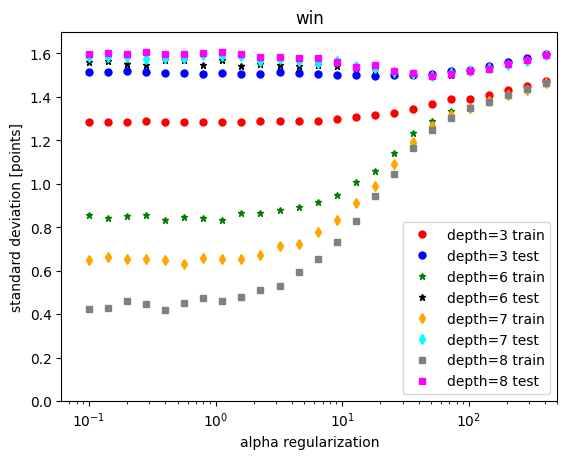

In [109]:
wval3=np.loadtxt('value_win2_b_xgb_depth3.txt')
#now 3 has the smallest minimum for 10000 but all seem similar
wval6=np.loadtxt('value_win2_b_xgb_depth6.txt')
wval7=np.loadtxt('value_win2_b_xgb_depth7.txt')
wval8=np.loadtxt('value_win2_b_xgb_depth8.txt')
plt.plot(wval3[0,:],wval3[2,:],'o',ms=5,color='red',label='depth=3 train') 
plt.plot(wval3[0,:],wval3[3,:],'o',ms=5,color='blue',label='depth=3 test') 
plt.plot(wval6[0,:],wval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wval6[0,:],wval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wval7[0,:],wval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wval7[0,:],wval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wval8[0,:],wval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wval8[0,:],wval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("win")
plt.ylabel("standard deviation [points]")

In [ ]:
Now linear regression on the same data. 

In [110]:
#a few nan remove
df_win_feature_train2_value[df_win_feature_train2_value.isnull()]=0
df_win_feature_test2_value[df_win_feature_test2_value.isnull()]=0
df_win_target_train2_value[df_win_target_train2_value.isnull()]=0
df_win_target_test2_value[df_win_target_test2_value.isnull()]=0
lopen1_val=LinearRegression().fit(df_win_feature_train2_value,df_win_target_train2_value)
lpred_te_val=lopen1_val.predict(df_win_feature_test2_value)
lpred_tr_val=lopen1_val.predict(df_win_feature_train2_value)
print(f"train standard deviation data {np.std(df_win_target_train2_value)}")
print(f"test standard deviation data {np.std(df_win_target_test2_value)}")
print(f"train standard deviation {np.std(lpred_tr_val-df_win_target_train2_value)}")
print(f"test standard deviation {np.std(lpred_te_val-df_win_target_test2_value)}")
#old 10000 in train 
#train standard deviation data 2.472126781999639
#test standard deviation data 2.5057353349376843
#train standard deviation 1.587594048515046
#test standard deviation 1.5767196940580885

train standard deviation data 2.4047855992858187
test standard deviation data 2.508523703358656
train standard deviation 1.5781050128458223
test standard deviation 1.6824265810727062


In [ ]:
Somewhat less improvement than xgbbost, but looks good enough. Is now exported. 

In [86]:
def linear_function(coefs,data):
    res=coefs[0]+np.matmul(coefs[1:coefs.shape[0]],data)
    return res

In [112]:
allpar=np.zeros((10))
allpar[0]=lopen1_val.intercept_
allpar[1:10]=lopen1.coef_
print(allpar)
#old 10000
# [ 2.13616358 -1.1564831  -0.09591479 -0.17654283  0.06124354  0.08596344 -0.14850562 -0.20324485  0.01521082  0.00277937]
#write protect 
#np.savetxt("linear_par_value_v1.txt",allpar)
#15000
#np.savetxt("linear_par_value_v2.txt",allpar)
#start

[ 2.37295624 -1.14574741 -0.06623363 -0.12634143  0.05482527  0.03289027
 -0.11501194 -0.22694921  0.02085282 -0.01256042]


Now I determine the best option and let it run again and save it then.

I define a function for it. 
As visisble in the plots above, there is no clear minimum in case of the classification cases but many choices get a similar floor value. The actual minimum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more reliable, the following procedure is used. Quantile in the test sample are calculaated from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minimuum is always is those for classification. 
This qunatiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
That define the maximum allowed metric value, it is then used the larged regularization with the smallest possible max depth. 

In [113]:
#find (and run) best xgbosst (regression and classification) of a collection
#parameters are list of the files with the metric and parameters, train_features, train_targtes, whether regression (default) or classification
def find_best(list_inputs,feature_train,target_train,output_file_name,regression=True):
    a=np.loadtxt(list_inputs[0])
    all_metrics=np.zeros((5,len(list_inputs),a.shape[1]))

    for i in range(len(list_inputs)):
        a=np.loadtxt(list_inputs[i])
        all_metrics[0:4,i,:]=a
    #first just using minimum in data
    s1=np.unravel_index(np.argmin(all_metrics[3,:,:]),all_metrics[3,:,:].shape)
    s2=np.argsort(all_metrics[3,:,:],axis=None)
    #small input use minium as do regression 
    if regression==True or len(list_inputs)<3:
        #to the minium seems fine for regression 
        if regression==True:
            print(f"minimum of {round(all_metrics[3,s1[0],s1[1]],2)} points is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
            reg4=XGBRegressor(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
            #and save it
            reg4.save_model(output_file_name)
            #classification
        else:  
            print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
            reg4=XGBClassifier(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
            #and save it
            reg4.save_model(output_file_name) 
    else:
        #for classification the minimum seems not good defined
        #but many choices get a similar floor value. The actual minum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more relaible, the following procedure is used. Quantile in the test sample are calcauted from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minium is always is those for classification. 
        #This quantiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
        #That define the maximum allowed metric value
        r=np.quantile(all_metrics[3,4:8,:],[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
        print("quantiles of larger max depth half")
        print(r)
        #use them until they get larger again but at least the first 15%
        max_wrong=r[1]
        c=0
        while r[c+2]-r[c+1] <=(r[c+1]-r[0])/(1+c):
            max_wrong=r[c+2]
            c+=1
        print(f"accepted percentage  is {round(100*max_wrong,2)}")  
        #get maximum alpha within this limit, by increasing in alpha in loop start value is mimumum
        #loop goes the other way in max_depth to have this as small as possible
        value=[all_metrics[1,s1[0],s1[1]],all_metrics[0,s1[0],s1[1]]]
        per=all_metrics[3,s1[0],s1[1]]
        for j in range(all_metrics.shape[2]): 
            for i in range(all_metrics.shape[1]):
                if all_metrics[3,7-i,j]<=max_wrong:
                    value[0]=all_metrics[1,7-i,j]
                    value[1]=all_metrics[0,7-i,j] 
                    per=all_metrics[3,7-i,j] 
        print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        print(f"used of {round(100*per,2)} % is at alpha={round(value[1],2)} and max_depth={int(value[0])}")        
        reg4=XGBClassifier(max_depth=int(value[0]),reg_alpha=value[1]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)        

Now running it for all the options of three targets and two different samples each. 

In [268]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_hum,df_hum_feature_train2_value,df_hum_target_train2_value,'xgb_value_hum1.json')

minimum of 1.54 points is at alpha=18.06 and max_depth=4


In [269]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
#find_best(list_val_win,df_win_feature_train2_value,df_win_target_train2_value,'xgb_value_win1.json')

minimum of 1.49 points is at alpha=51.06 and max_depth=5


In [270]:
list_op_hum=['take_open_hum2_xgb_depth1.txt','take_open_hum2_xgb_depth2.txt','take_open_hum2_xgb_depth3.txt','take_open_hum2_xgb_depth4.txt','take_open_hum2_xgb_depth5.txt','take_open_hum2_xgb_depth6.txt','take_open_hum2_xgb_depth7.txt','take_open_hum2_xgb_depth8.txt']
#find_best(list_op_hum,df_hum_feature_train2,df_hum_target_train2,'xgb_open_hum1.json',regression=False)

quantiles of larger max depth half
[0.07276819 0.07426857 0.07576894 0.07776944 0.08732183 0.09211053
 0.10727682 0.10777694 0.11052763 0.32733183]
accepted percentage  is 7.58
minimum of 6.95 % is at alpha=0.28 and max_depth=5
used of 7.5 % is at alpha=4.52 and max_depth=7


In [271]:
list_op_win=['take_open_win2_xgb_depth1.txt','take_open_win2_xgb_depth2.txt','take_open_win2_xgb_depth3.txt','take_open_win2_xgb_depth4.txt','take_open_win2_xgb_depth5.txt','take_open_win2_xgb_depth6.txt','take_open_win2_xgb_depth7.txt','take_open_win2_xgb_depth8.txt']
#find_best(list_op_win,df_win_feature_train2,df_win_target_train2,'xgb_open_win1.json',regression=False)

quantiles of larger max depth half
[0.07920299 0.08069738 0.08219178 0.08418431 0.08719801 0.09310087
 0.09937733 0.0996264  0.1003736  0.31880448]
accepted percentage  is 8.22
minimum of 7.52 % is at alpha=3.2 and max_depth=5
used of 7.97 % is at alpha=9.03 and max_depth=8


In [272]:
list_dis_hum=['discard_hum2_xgb_depth1.txt','discard_hum2_xgb_depth2.txt','discard_hum2_xgb_depth3.txt','discard_hum2_xgb_depth4.txt','discard_hum2_xgb_depth5.txt','discard_hum2_xgb_depth6.txt','discard_hum2_xgb_depth7.txt','discard_hum2_xgb_depth8.txt']
#find_best(list_dis_hum,df_hum_feature_train2_discard,df_hum_target_train2_discard,'xgb_discard_hum1.json',regression=False)

quantiles of larger max depth half
[0.07081763 0.07341748 0.07526375 0.07673323 0.08104748 0.09042954
 0.09984928 0.11152977 0.12207988 0.50263753]
accepted percentage  is 7.67
minimum of 6.59 % is at alpha=4.52 and max_depth=8
used of 7.65 % is at alpha=6.39 and max_depth=4


In [273]:
list_dis_win=['discard_win2_xgb_depth1.txt','discard_win2_xgb_depth2.txt','discard_win2_xgb_depth3.txt','discard_win2_xgb_depth4.txt','discard_win2_xgb_depth5.txt','discard_win2_xgb_depth6.txt','discard_win2_xgb_depth7.txt','discard_win2_xgb_depth8.txt']
#find_best(list_dis_win,df_win_feature_train2_discard,df_win_target_train2_discard,'xgb_discard_win1.json',regression=False)

quantiles of larger max depth half
[0.1064695  0.10900185 0.11007394 0.11127542 0.11312384 0.11661738
 0.13778189 0.15637708 0.16451017 0.43992606]
accepted percentage  is 11.13
minimum of 10.43 % is at alpha=0.28 and max_depth=7
used of 11.09 % is at alpha=12.77 and max_depth=6


Now the used values seem reasonable are not so likely overfit. 

However, the performance in the game is not so good. Thus, I now reduce the number of features.
First I get the feature importance to decide which to exclude.

feature open_pile_card
human 0.824 win 0.871
feature own_n_closed
human 0.011 win 0.01
feature own_n_open
human 0.025 win 0.011
feature own_sum
human 0.018 win 0.015
feature own_max
human 0.064 win 0.047
feature other_player_n_closed
human 0.015 win 0.015
feature other_player_n_open
human 0.012 win 0.011
feature other_player_sum
human 0.013 win 0.009
feature other_player_max
human 0.013 win 0.008


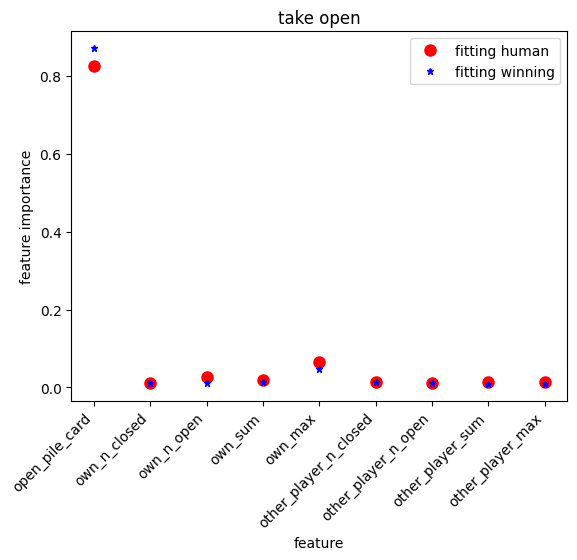

In [114]:

level9_2players_model_open = XGBClassifier()
level9_2players_model_open.load_model("xgb_open_hum1.json")

level9_2players_model_discard = XGBClassifier()
level9_2players_model_discard.load_model("xgb_discard_hum1.json")

level11_2players_model_open = XGBClassifier()
level11_2players_model_open.load_model("xgb_open_win1.json")

level11_2players_model_discard = XGBClassifier()
level11_2players_model_discard.load_model("xgb_discard_win1.json")

plt.plot(df_hum_feature_train2.columns,level9_2players_model_open.feature_importances_,'o',ms=8,color='red',label='fitting human') 
plt.plot(df_win_feature_train2.columns,level11_2players_model_open.feature_importances_,'*',ms=5,color='blue',label='fitting winning') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
plt.title("take open")
for i in range(len(df_hum_feature_train2.columns)):
    print(f"feature {df_hum_feature_train2.columns[i]}")
    print(f"human {int(level9_2players_model_open.feature_importances_[i]*1000)/1000} win {int(level11_2players_model_open.feature_importances_[i]*1000)/1000}")

Only card on face open pile and maximum of own cards seem to matter, all others clearly less, thus only those two are used now. 

feature open_pile_card
human 0.028 win 0.02
feature own_n_closed
human 0.089 win 0.03
feature own_n_open
human 0.015 win 0.014
feature own_sum
human 0.027 win 0.012
feature own_max
human 0.16 win 0.197
feature other_player_n_closed
human 0.015 win 0.029
feature other_player_n_open
human 0.044 win 0.007
feature other_player_sum
human 0.016 win 0.019
feature other_player_max
human 0.01 win 0.009
feature discard_value
human 0.59 win 0.657


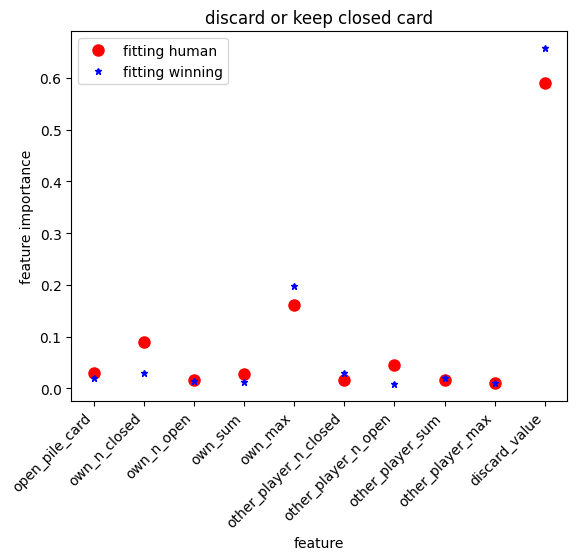

In [115]:

plt.plot(df_hum_feature_train2_discard.columns,level9_2players_model_discard.feature_importances_,'o',ms=8,color='red',label='fitting human') 
plt.plot(df_win_feature_train2_discard.columns,level11_2players_model_discard.feature_importances_,'*',ms=5,color='blue',label='fitting winning') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
plt.title("discard or keep closed card")
for i in range(len(df_hum_feature_train2_discard.columns)):
    print(f"feature {df_hum_feature_train2_discard.columns[i]}")
    print(f"human {int(level9_2players_model_discard.feature_importances_[i]*1000)/1000} win {int(level11_2players_model_discard.feature_importances_[i]*1000)/1000}")

Again most are not important, only two are important for human two more could be added, for simplicity we use the same 2 for both, human imitation is anyway less important thus extra work for it is not efficient.

Below the restricted columns choices are slected tahn solit in train and test.

In [116]:
#selection for open 
col_sel1b=[ 'open_pile_card','own_max','action_take_open','entry_number']
#select them 
df_hum_sel2_open=df_hum.loc[:,col_sel1b]
df_hum_win_sel2_open=df_hum_win.loc[:,col_sel1b]
df_win_sel2_open=df_win.loc[:,col_sel1b]
#selection for discard
col_sel2b=[ 'own_max','discard_value','action_discard','entry_number']
#select them 
df_hum_sel2_discard=df_hum_discard.loc[:,col_sel2b]
df_hum_win_sel2_discard=df_hum_win_discard.loc[:,col_sel2b]
df_win_sel2_discard=df_win_discard.loc[:,col_sel2b]
#splitting by games 
df_win_feature_train3,df_win_feature_test3,df_win_target_train3,df_win_target_test3=split_test(df_win_sel2_open.iloc[:,0:2],df_win_sel2_open.iloc[:,2], df_win_sel2_open.iloc[:,3],0.6)
df_hum_feature_train3,df_hum_feature_test3,df_hum_target_train3,df_hum_target_test3=split_test(df_hum_sel2_open.iloc[:,0:2],df_hum_sel2_open.iloc[:,2], df_hum_sel2_open.iloc[:,3],0.6)
df_hum_win_feature_train3,df_hum_win_feature_test3,df_hum_win_target_train3,df_hum_win_target_test3=split_test(df_hum_win_sel2_open.iloc[:,0:2],df_hum_win_sel2_open.iloc[:,2], df_hum_win_sel2_open.iloc[:,3],0.6)
#now for discard 
df_win_feature_train3_discard,df_win_feature_test3_discard,df_win_target_train3_discard,df_win_target_test3_discard=split_test(df_win_sel2_discard.iloc[:,0:2],df_win_sel2_discard.iloc[:,2], df_win_sel2_discard.iloc[:,3],0.6)
df_hum_feature_train3_discard,df_hum_feature_test3_discard,df_hum_target_train3_discard,df_hum_target_test3_discard=split_test(df_hum_sel2_discard.iloc[:,0:2],df_hum_sel2_discard.iloc[:,2], df_hum_sel2_discard.iloc[:,3],0.6)
df_hum_win_feature_train3_discard,df_hum_win_feature_test3_discard,df_hum_win_target_train3_discard,df_hum_win_target_test3_discard=split_test(df_hum_win_sel2_discard.iloc[:,0:2],df_hum_win_sel2_discard.iloc[:,2], df_hum_win_sel2_discard.iloc[:,3],0.6)

#increased from 81000 to 15000 in train here

15037
15102
14945
15003
12910
12910
9584
9620
9421
9466
8092
8106


In [ ]:
Now creating the samples. 

In [117]:
for i in range(1,3):
    loop_reg(df_win_feature_train3,df_win_target_train3,df_win_feature_test3,df_win_target_test3 ,i,0.01,1.414,40,'take_open_win3_c_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1088 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 1
xgb took 0.0742 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 2
xgb took 0.0572 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 3
xgb took 0.0561 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 4
xgb took 0.0661 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 5
xgb took 0.0561 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 6
xgb took 0.0855 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 7
xgb took 0.0657 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 8
xgb took 0.0661 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 9
xgb took 0.0657 seconds
percentage wrong test 8.18
percentage wrong train 7.69 
doing case 10
xgb took 0.062 seconds
percentage wrong test 8.18
percen

Text(0, 0.5, '% wrong')

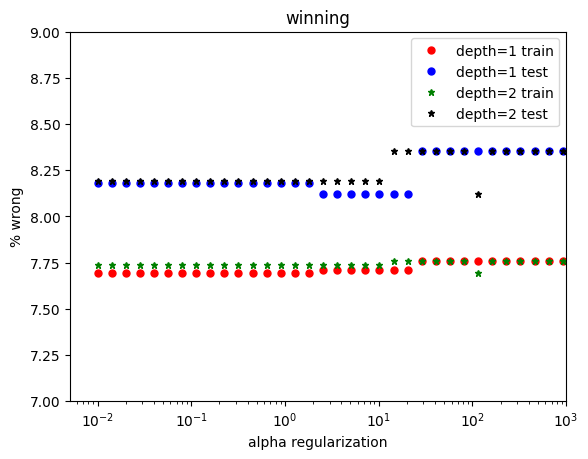

In [121]:
w2op1=np.loadtxt('take_open_win3_c_xgb_depth1.txt')
w2op2=np.loadtxt('take_open_win3_c_xgb_depth2.txt')

plt.plot(w2op1[0,:],100*w2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(w2op1[0,:],100*w2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(w2op2[0,:],100*w2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(w2op2[0,:],100*w2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(7,9)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

In [122]:
for i in range(1,3):
    loop_reg(df_hum_feature_train3,df_hum_target_train3,df_hum_feature_test3,df_hum_target_test3 ,i,0.01,1.414,40,'take_open_hum3_c_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0976 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 1
xgb took 0.0577 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 2
xgb took 0.0602 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 3
xgb took 0.0566 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 4
xgb took 0.0685 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 5
xgb took 0.0608 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 6
xgb took 0.068 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 7
xgb took 0.0761 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 8
xgb took 0.067 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 9
xgb took 0.0763 seconds
percentage wrong test 7.86
percentage wrong train 7.22 
doing case 10
xgb took 0.0687 seconds
percentage wrong test 7.86
percent

Text(0, 0.5, '% wrong')

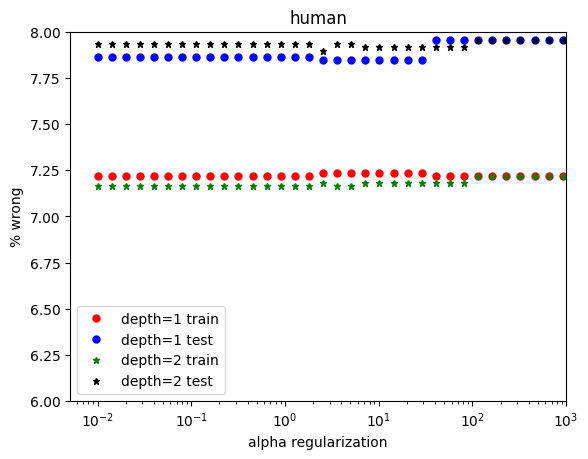

In [125]:
h2op1=np.loadtxt('take_open_hum3_c_xgb_depth1.txt')
h2op2=np.loadtxt('take_open_hum3_c_xgb_depth2.txt')

plt.plot(h2op1[0,:],100*h2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(h2op1[0,:],100*h2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(h2op2[0,:],100*h2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(h2op2[0,:],100*h2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(6,8)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

In [126]:
for i in range(1,3):
    loop_reg(df_hum_feature_train3_discard,df_hum_target_train3_discard,df_hum_feature_test3_discard,df_hum_target_test3_discard ,i,0.01,1.414,40,'discard_hum3_c_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0672 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 1
xgb took 0.0507 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 2
xgb took 0.0708 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 3
xgb took 0.0473 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 4
xgb took 0.0417 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 5
xgb took 0.0405 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 6
xgb took 0.045 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 7
xgb took 0.0409 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 8
xgb took 0.0402 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 9
xgb took 0.0501 seconds
percentage wrong test 12.35
percentage wrong train 10.69 
doing case 10
xgb took 0.0426 seconds
percentage wr

Text(0, 0.5, '% wrong')

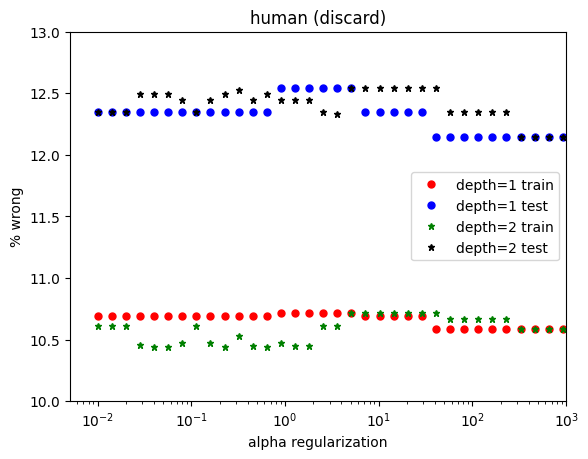

In [128]:
dh2op1=np.loadtxt('discard_hum3_c_xgb_depth1.txt')
dh2op2=np.loadtxt('discard_hum3_c_xgb_depth2.txt')

plt.plot(dh2op1[0,:],100*dh2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(dh2op1[0,:],100*dh2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(dh2op2[0,:],100*dh2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(dh2op2[0,:],100*dh2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(10,13)
plt.xlabel("alpha regularization")
plt.title("human (discard)")
plt.ylabel("% wrong")

In [129]:
for i in range(1,3):
    loop_reg(df_win_feature_train3_discard,df_win_target_train3_discard,df_win_feature_test3_discard,df_win_target_test3_discard ,i,0.01,1.414,40,'discard_win3_c_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0683 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 1
xgb took 0.0558 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 2
xgb took 0.0573 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 3
xgb took 0.0415 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 4
xgb took 0.0422 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 5
xgb took 0.0413 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 6
xgb took 0.0493 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 7
xgb took 0.0427 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 8
xgb took 0.0604 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 9
xgb took 0.0442 seconds
percentage wrong test 15.83
percentage wrong train 13.27 
doing case 10
xgb took 0.059 seconds
percentage wr

Text(0, 0.5, '% wrong')

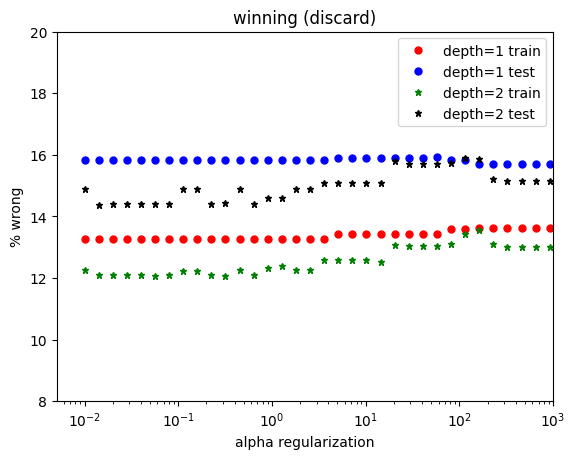

In [130]:
dw2op1=np.loadtxt('discard_win3_c_xgb_depth1.txt')
dw2op2=np.loadtxt('discard_win3_c_xgb_depth2.txt')

plt.plot(dw2op1[0,:],100*dw2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(dw2op1[0,:],100*dw2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(dw2op2[0,:],100*dw2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(dw2op2[0,:],100*dw2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(8,20)
plt.xlabel("alpha regularization")
plt.title("winning (discard)")
plt.ylabel("% wrong")

There is still no clear minimum. Since the number of feature is smaller just the minimum is used. Further it is fitted to all data to make it more robust.

In [127]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_hum,df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11],'xgb_value_hum2.json')

minimum of 1.46 points is at alpha=72.2 and max_depth=8


In [129]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_win,df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11],'xgb_value_win2.json')

minimum of 1.46 points is at alpha=36.11 and max_depth=3


In [137]:
list_op_hum=['take_open_hum3_xgb_depth1.txt','take_open_hum3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_op_hum,df_hum_sel2_open.iloc[:,0:2],df_hum_sel2_open.iloc[:,2],'xgb_open_hum2.json',regression=False)

minimum of 8.25 % is at alpha=1.81 and max_depth=2


In [138]:
list_op_win=['take_open_win3_xgb_depth1.txt','take_open_win3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_op_win,df_win_sel2_open.iloc[:,0:2],df_win_sel2_open.iloc[:,2],'xgb_open_win2.json',regression=False)

minimum of 8.38 % is at alpha=3.61 and max_depth=2


In [140]:
list_dis_hum=['discard_hum3_xgb_depth1.txt','discard_hum3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_dis_hum,df_hum_sel2_discard.iloc[:,0:2],df_hum_sel2_discard.iloc[:,2],'xgb_discard_hum2.json',regression=False)

minimum of 11.12 % is at alpha=0.03 and max_depth=2


In [141]:
list_dis_win=['discard_win3_xgb_depth1.txt','discard_win3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_dis_win,df_win_sel2_discard.iloc[:,0:2],df_win_sel2_discard.iloc[:,2],'xgb_discard_win2.json',regression=False)

minimum of 14.3 % is at alpha=0.03 and max_depth=2


In [144]:
#the columns used
print(df_hum_sel2_open.columns,df_hum_sel2_discard.columns)

Index(['open_pile_card', 'own_max', 'action_take_open', 'entry_number'], dtype='object') Index(['own_max', 'discard_value', 'action_discard', 'entry_number'], dtype='object')


This still seems not to be an improvement. Maybe I need to add something to intentify card for vanishing. 

In [275]:
print(df_hum_feature_train2.columns)

Index(['open_pile_card', 'own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max'],
      dtype='object')


In [202]:
res=df_hum.groupby(df_hum.open_pile_card).mean()

In [55]:
print(res)

                acting_player  number_of_-2_in_open  number_of_-1_in_open  \
open_pile_card                                                              
-2.0                      0.0              0.057143              0.114286   
-1.0                      0.0              0.031496              0.062992   
 0.0                      0.0              0.074380              0.119835   
 1.0                      0.0              0.037815              0.084034   
 2.0                      0.0              0.044510              0.109792   
 3.0                      0.0              0.045024              0.101896   
 4.0                      0.0              0.052459              0.122951   
 5.0                      0.0              0.037196              0.125894   
 6.0                      0.0              0.048387              0.129032   
 7.0                      0.0              0.032297              0.141148   
 8.0                      0.0              0.043735              0.140662   

In [118]:
#checking for problems in kept card below 
list_f=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_f.sort()
games_stat=np.zeros((4,len(list_f)))
for i in range(len(list_f)):
    print(i)
    a=np.loadtxt(list_f[i])
    print(np.mean(a[1,:]))
    df2=pd.DataFrame(data = a.T, index=range(a.shape[1]),columns = columns2)
    games_stat[0,i]=i
    games_stat[1,i]=np.mean(a[1,:])
    games_stat[2,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].mean()
    games_stat[3,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].std()/np.sqrt(df2.iloc[:,44][(df2.iloc[:,44]!=30)].sum())
    print(games_stat[2,i])
#46 to  50 one run of game with more global variables  
#and 51 to 53

0
6.130434782608695
4.2875
1
6.63013698630137
4.666666666666667
2
6.15
4.706896551724138
3
7.976470588235294
7.861538461538461
4
6.885416666666667
4.552238805970149
5
7.571428571428571
7.5055555555555555
6
8.875
8.91764705882353
7
6.611111111111111
4.956521739130435
8
7.876712328767123
7.649122807017544
9
6.657534246575342
4.790697674418604
10
6.260273972602739
4.948717948717949
11
6.753968253968254
5.232876712328767
12
7.01010101010101
5.734375
13
6.040404040404041
4.333333333333333
14
7.261363636363637
5.446153846153846
15
8.232558139534884
8.285714285714286
16
6.077669902912621
5.206896551724138
17
6.972222222222222
5.185714285714286
18
8.378947368421052
7.733333333333333
19
8.309734513274336
8.568181818181818
20
8.065573770491802
8.644444444444444
21
8.785714285714286
8.423728813559322
22
6.65934065934066
4.966666666666667
23
6.726190476190476
5.0
24
6.2745098039215685
4.3
25
6.598639455782313
4.963636363636364
26
8.292307692307693
6.964285714285714
27
8.722222222222221
7.908163265

In [107]:
print(columns2)
print(a.shape)

['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker', 

discard_value


Text(0, 0.5, 'points')

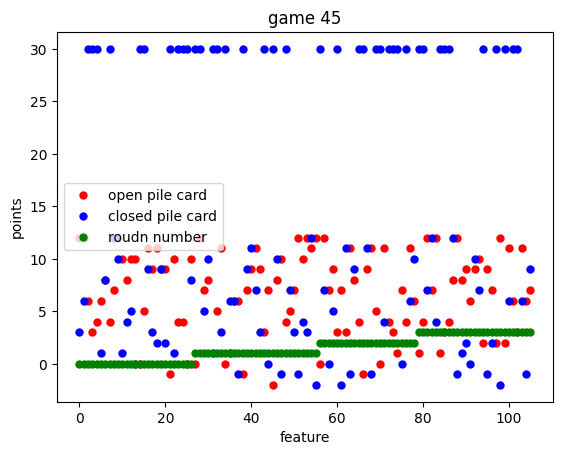

In [108]:
print(columns2[44])
plt.plot(range(106),a[1,:],'o',ms=5,color='red',label='open pile card') 
plt.plot(range(106),a[44,:],'o',ms=5,color='blue',label='closed pile card') 
plt.plot(range(106),a[51,:],'o',ms=5,color='green',label='roudn number') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("game 45")
plt.xlabel("feature")
plt.ylabel("points")

Seem to that create has some problem in games for sure, likely also rounds. 

Text(0, 0.5, 'points')

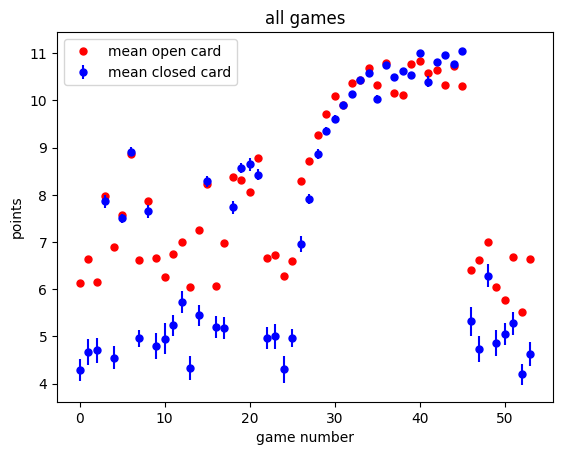

In [120]:
plt.plot(games_stat[0,:],games_stat[1,:],'o',ms=5,color='red',label='mean open card') 
plt.errorbar(games_stat[0,:],games_stat[2,:], yerr=games_stat[3,:],ms=5, fmt='o',color='blue',label='mean closed card')
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("all games")
plt.xlabel("game number")
plt.ylabel("points")

Forgotten global caused the piles to worsen. Looks now good. Closed should better be better than open because open gets the too bad cards of closed and deck. Average shoudl be 5.07 in closed deviation from it is likely just random. 

In [99]:
pile_closed=Pile('create_closed',False)
print(pile_closed)

Pile has length of 150 Cards and is closed. Its position is at [20, 10]


Text(0, 0.5, 'points')

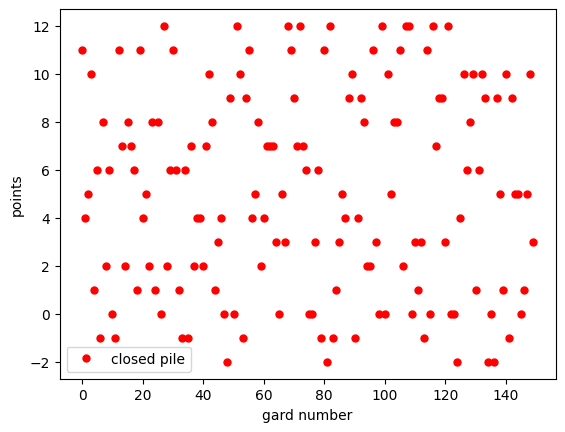

In [105]:
res=np.zeros((2,150))
for i in range(150):
    res[0,i]=i
    res[1,i]=pile_closed.list_cards[i].number
plt.plot(res[0,:],res[1,:],'o',ms=5,color='red',label='closed pile') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("")
plt.xlabel("card number")
plt.ylabel("points")

In [121]:
print(a[44,:])

[ 3.  6. 30. 30. 30.  1.  8. 30. 12. 10.  1.  4.  5.  0. 30. 30.  9.  3.
  2.  9.  2. 30.  1. 30. 30. 30.  8. 30. 30.  5. 10. 30. 30.  3. 30.  6.
  6. -1. 30.  9. 11.  7.  3. 30.  0. 30. 10. -1. 30.  7.  3. -1.  4.  3.
 12. -2. 30.  7.  0.  5. 30. -2. 11. -1.  9. 30. 30. 11. -1. 30. 30.  4.
 30. 30. 30.  0. 30.  6. 10. 30. 30.  7. 12.  4. 30. 30. 30. 12. -1.  1.
  2.  0. 10.  7. 30. -1.  2. 30. -2. 30.  6. 30. 30.  6. -1.  9.]


In [ ]:
#some double data is better excluded from previous fits (but small impact since not much affected)